### Using Pandas to read in the CSV files

In [96]:
import pandas as pd

In [97]:
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                parse_dates=['Date'],
                index_col=['Date'])

In [98]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [100]:
# How many samples we have
len(df)

2787

In [101]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)'])
bitcoin_prices.rename(columns={'Closing Price (USD)': 'Price'}, inplace=True)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


<Figure size 1000x700 with 0 Axes>

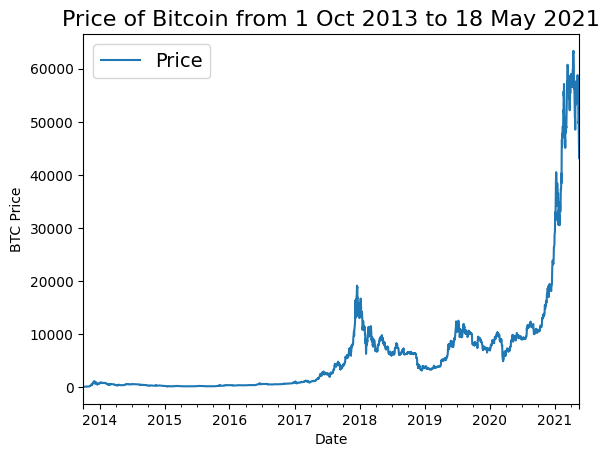

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
bitcoin_prices.plot();
plt.ylabel('BTC Price');
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021',fontsize=16);
plt.legend(fontsize=14);

### Importing time series data with Python's CSV module

In [103]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open ('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # element 1 of each row is a date in form 
        # of string which is parsed into datetime object
        btc_price.append(float(line[2]))

## Format data part 1:Create train and test sets of our time serise data 

### Create train and test set with time serise data (the wrong way)

In [104]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [105]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

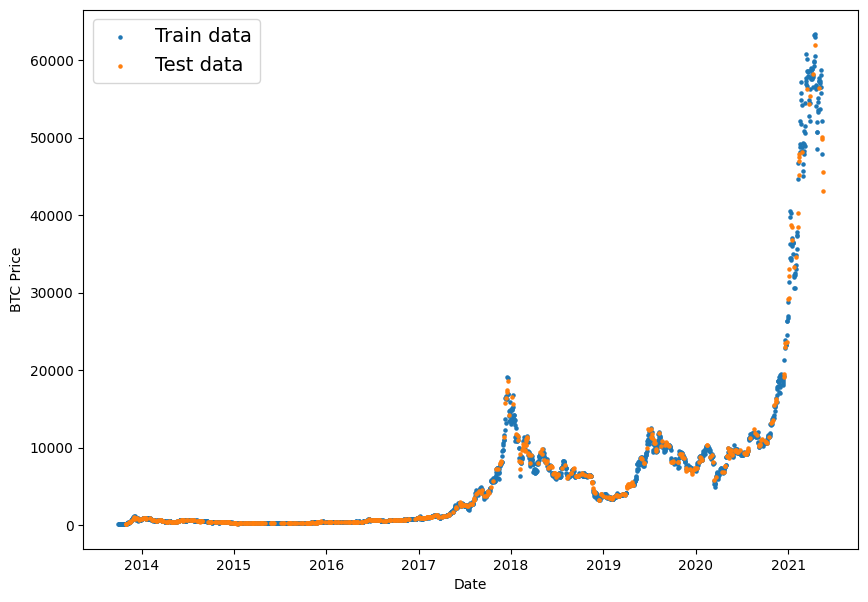

In [107]:
# Ploting the wrong train test split
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s = 5, label='Test data')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

**There is a problem in our spliting of data here becoz our test dataset is being riddled with the training dataset**

In [108]:
# Creating the train test split in a right way
split_size = int(0.8 * len(prices)) # 80% training data & 20% test data

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Creating test data split
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

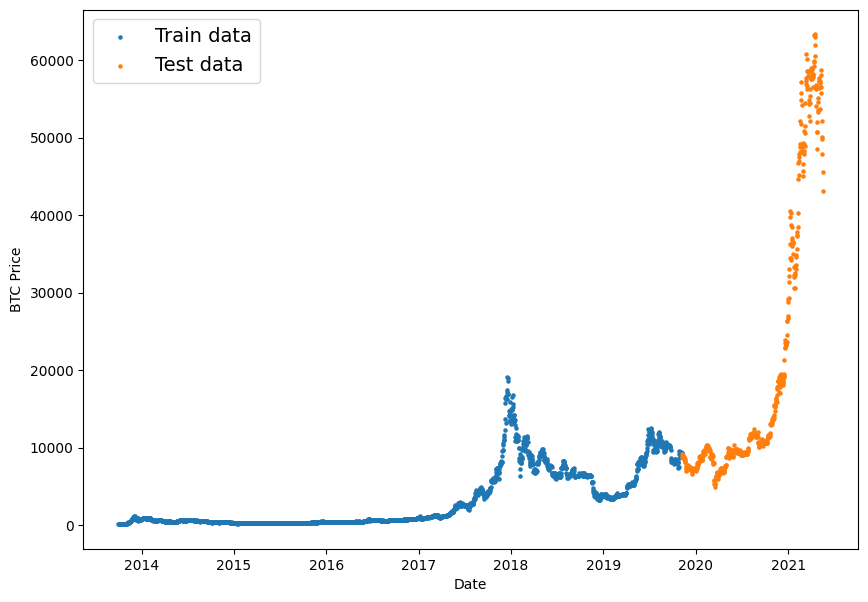

In [109]:
# Ploting the right train test split
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s = 5, label='Test data')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Creating a function to plot time serise data 

In [110]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    """
    Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ---------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values, default = None
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)  # make label bigger
    plt.grid(True)


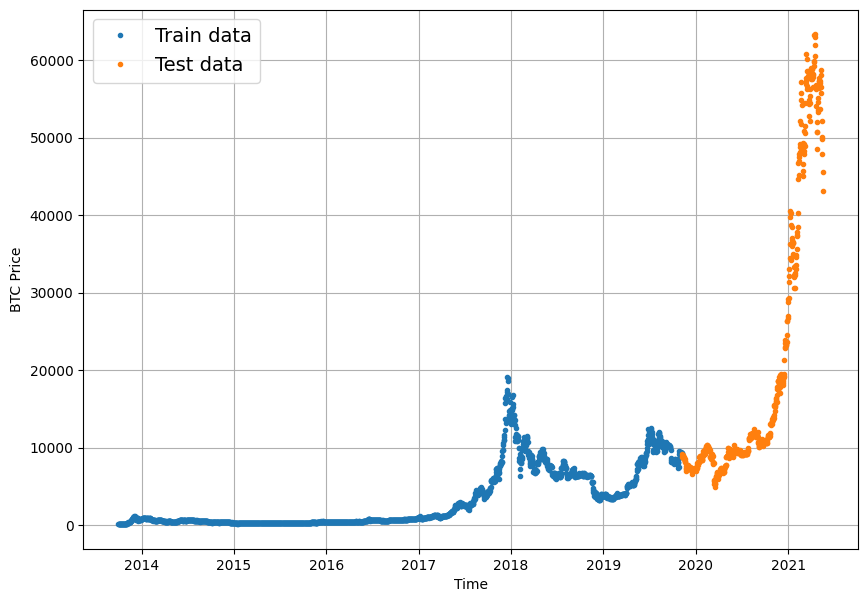

In [111]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plt.show()

* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict `horizon`

## Model 0: Naive forecast (baseline)

In [112]:
# Create a naive forecast
naive_forcast = y_test[:-1]

naive_forcast[:10], naive_forcast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [113]:
y_test[:10], y_test[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

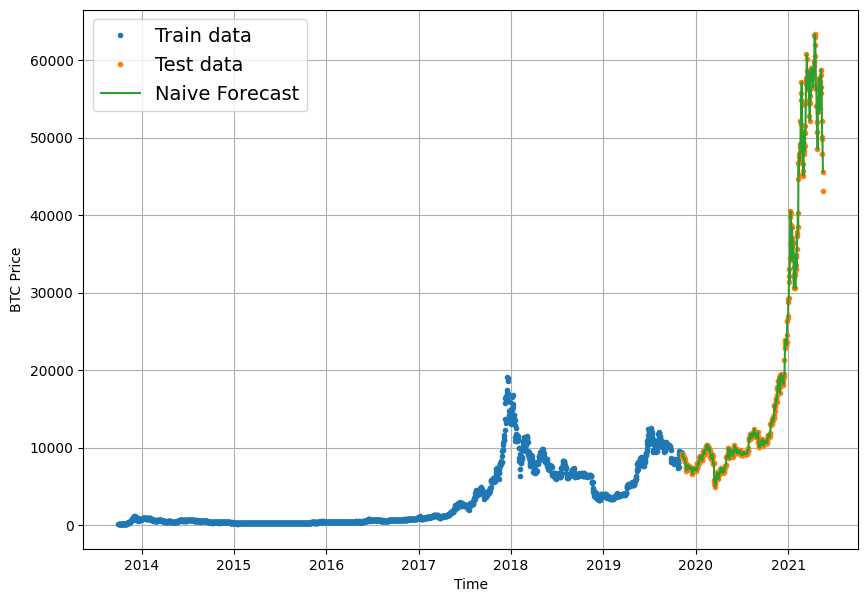

In [114]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forcast, format="-", label="Naive Forecast")

## Evaluating Time Serise Model

Here also we are predicting numbers so some of the regression matrix can also be used here like:
* MAE
* MSE
* RMSE
* MAPE
* MASE

### Implementing MASE (no seasonality data)
MASE formula changes with the seasonality data

In [115]:
import tensorflow as tf

In [116]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implementing MASE (assuming no seasonality of data)
    """
    # Find MAE of naive forecast (no seasonality)
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day so shift of 1
    return mae/mae_naive_no_season

In [117]:
# Test of MASE (this ideal value should be 1 or very close to 1 with the naive_forcast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forcast).numpy()

0.9995699939182624

In [118]:
# Create a function to take in model predictions and truth values and return evalution metrics
def evaluation_preds(y_true, y_pred):
    # for metric calculation float32 is being used tensorflow also uses float32 but numpy uses float64
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evalution metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
        
    return {'mae':mae.numpy(),
           'mse': mse.numpy(),
           'rmse': rmse.numpy(),
           'mape': mape.numpy(),
           'mase': mase.numpy()}

In [119]:
naive_results = evaluation_preds(y_true=y_test[1:],
                                y_pred=naive_forcast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [120]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [121]:
tf.reduce_min(y_test),tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

In [122]:
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [123]:
# Let's setup Global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of bitcoin data to make the prediction

In [124]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
    '''
    Creates labels for windowed dataset
    '''
    return x[:, :-horizon], x[:, -horizon:]

In [125]:
# Test out the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


To convert the time serise data into windowed data we can use for loop but it will take alot of time to do so we create a funtion for this work

Job of our function:
* Create a window step of specific window size (e.g [0,1,2,3,4,5,6])
* Use Numpy indexing to create a 2D array of multiple window steps for example:
      [[0,1,2,3,4,5,6],
      [1,2,3,4,5,6,7],
      [2,3,4,5,6,7,8]]
     
* uses the 2D array of multiple window steps (from 2.) to index on a target serise (e.g. the historical price of Bitcoin)
* Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [126]:
import numpy as np

In [127]:
# create a function to view arrays as windows
def make_windows(x, window_size=WINDOW_SIZE,horizon=HORIZON):
    '''
    Turns a 1D array into 2D array of sequential labelled window of window size with horizon size label
    '''
    # 1. Create a window of specific window_size (Add the horizon on the end for labelling later)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    # 2. Create a 2D array of multiple window steps (minus 1 to to account 0 indexing)
    window_index = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    # 3. Index on the target array (a time serise) with 2D array of multiple steps
    windowed_array = x[window_index]
    # 4. Get the labelled window
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows,labels

In [128]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [129]:
# View the first 3 windows/labels
for i in range(3):
    print(f"Window {full_windows[i]} -> Label {full_labels[i]}")

Window [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [130]:
# View the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


### Breaking the windowed data into training and test sets

In [131]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [132]:
# Make training and test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    '''
    Splits matching pairs of windows and labels into train and test splits.
    '''
    split_size = int(len(windows) * (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_window = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_window, train_labels, test_labels

In [133]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [134]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [135]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [136]:
# see if the training labels are same as before
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint
Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint to compare them.

More specifically, we want to compare one model's best performances against the other model's best performance.

For ex: if our model performs the best on epoch 55 (but we're training for 100 epochs) we want to load and evaluate the model saved on epoch 55.


In [137]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              verbose=0,
                                             save_best_only=True)

## Model 1: Desnse model (window = 7, horizon = 1)
* Dense model with 128 hidden units
* An output layer with linear activation y=x (no activation)
* Adam optimization and mae optimization
* Batch size of 128
* 100 epochs

These values are picked from experiments
* **Hyperparameter** = values that we adjust
* **Parameters** = values a model learns on its own

In [138]:
import tensorflow as tf
from tensorflow.keras import layers

In [139]:
# Set the random seed
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

# 2. compile
model_1.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])

# 3. Fit the model
model_1.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           verbose=1,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 20s - loss: 3276.2803 - mae: 3276.2803 - mse: 22167826.0000INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 2s 77ms/step - loss: 1397.2538 - mae: 1397.2538 - mse: 6803947.5000 - val_loss: 2330.3960 - val_mae: 2330.3960 - val_mse: 14282583.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 378.9742 - mae: 378.9742 - mse: 714216.1875INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 59ms/step - loss: 377.7633 - mae: 377.7633 - mse: 576849.8125 - val_loss: 1927.4458 - val_mae: 1927.4458 - val_mse: 9172084.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 250.9400 - mae: 250.9400 - mse: 222811.2656INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 67ms/step - loss: 241.7135 - mae: 241.7135 - mse: 292210.0625 - val_loss: 1379.8943 - val_mae: 1379.8943 - val_mse: 5433814.5000
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 217.7060 - mae: 217.7060 - mse: 241722.0000INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 64ms/step - loss: 215.5688 - mae: 215.5688 - mse: 237893.1719 - val_loss: 1174.5201 - val_mae: 1174.5201 - val_mse: 4496535.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 202.6155 - mae: 202.6155 - mse: 146093.7812INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 62ms/step - loss: 208.6420 - mae: 208.6420 - mse: 228086.2344 - val_loss: 1152.9727 - val_mae: 1152.9727 - val_mse: 4297059.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 161.9484 - mae: 161.9484 - mse: 99353.3984INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 59ms/step - loss: 203.7076 - mae: 203.7076 - mse: 214034.6562 - val_loss: 1137.8634 - val_mae: 1137.8634 - val_mse: 4284098.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 253.6677 - mae: 253.6677 - mse: 418393.5625INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 66ms/step - loss: 200.0314 - mae: 200.0314 - mse: 207742.7344 - val_loss: 1072.6594 - val_mae: 1072.6594 - val_mse: 3810484.7500
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 190.9584 - mae: 190.9584 - mse: 189769.7500 - val_loss: 1072.8301 - val_mae: 1072.8301 - val_mse: 3655359.7500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 157.0871 - mae: 157.0871 - mse: 110540.8594INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 85ms/step - loss: 183.9880 - mae: 183.9880 - mse: 179246.3594 - val_loss: 1040.7053 - val_mae: 1040.7053 - val_mse: 3435566.5000
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 179.1708 - mae: 179.1708 - mse: 170373.9062INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 72ms/step - loss: 179.1708 - mae: 179.1708 - mse: 170373.9062 - val_loss: 997.9664 - val_mae: 997.9664 - val_mse: 3188443.7500
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 172.9314 - mae: 172.9314 - mse: 158264.0781INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 65ms/step - loss: 172.9314 - mae: 172.9314 - mse: 158264.0781 - val_loss: 943.9591 - val_mae: 943.9591 - val_mse: 2971625.5000
Epoch 12/100
18/18 [==============================] - 0s 8ms/step - loss: 166.3291 - mae: 166.3291 - mse: 148029.9219 - val_loss: 984.7065 - val_mae: 984.7065 - val_mse: 2920622.0000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 130.0331 - mae: 130.0331 - mse: 107919.4062INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 66ms/step - loss: 163.2139 - mae: 163.2139 - mse: 145123.6875 - val_loss: 899.6891 - val_mae: 899.6891 - val_mse: 2596093.2500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 180.2785 - mae: 180.2785 - mse: 155863.7812INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 61ms/step - loss: 155.5197 - mae: 155.5197 - mse: 130958.8906 - val_loss: 872.2755 - val_mae: 872.2755 - val_mse: 2432465.0000
Epoch 15/100
18/18 [==============================] - 0s 8ms/step - loss: 152.9873 - mae: 152.9873 - mse: 126837.1250 - val_loss: 958.5780 - val_mae: 958.5780 - val_mse: 2612103.7500
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 149.8883 - mae: 149.8883 - mse: 91127.0078INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 67ms/step - loss: 150.4747 - mae: 150.4747 - mse: 122007.4375 - val_loss: 819.2408 - val_mae: 819.2408 - val_mse: 2148548.5000
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 139.1833 - mae: 139.1833 - mse: 98085.4062INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 68ms/step - loss: 142.4299 - mae: 142.4299 - mse: 111898.3047 - val_loss: 817.8029 - val_mae: 817.8029 - val_mse: 2085357.8750
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 147.4845 - mae: 147.4845 - mse: 99777.1250INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 68ms/step - loss: 140.2013 - mae: 140.2013 - mse: 109129.3281 - val_loss: 777.6461 - val_mae: 777.6461 - val_mse: 1939936.5000
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 80.1662 - mae: 80.1662 - mse: 35023.6094INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 53ms/step - loss: 135.4300 - mae: 135.4300 - mse: 103087.4609 - val_loss: 755.1477 - val_mae: 755.1477 - val_mse: 1847534.6250
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 139.7121 - mae: 139.7121 - mse: 108056.7500 - val_loss: 790.7425 - val_mae: 790.7425 - val_mse: 2050442.1250
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 135.6755 - mae: 135.6755 - mse: 98327.1484 INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 63ms/step - loss: 136.7539 - mae: 136.7539 - mse: 103156.7266 - val_loss: 731.8323 - val_mae: 731.8323 - val_mse: 1793670.6250
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 134.3219 - mae: 134.3219 - mse: 99969.6094 INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 62ms/step - loss: 133.6367 - mae: 133.6367 - mse: 99060.0000 - val_loss: 700.8240 - val_mae: 700.8239 - val_mse: 1650593.3750
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 126.0560 - mae: 126.0560 - mse: 87731.8125INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 56ms/step - loss: 126.7246 - mae: 126.7246 - mse: 91437.9062 - val_loss: 690.1494 - val_mae: 690.1494 - val_mse: 1606680.6250
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 142.4040 - mae: 142.4040 - mse: 96494.2188INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 58ms/step - loss: 128.5784 - mae: 128.5784 - mse: 92745.7656 - val_loss: 681.7350 - val_mae: 681.7350 - val_mse: 1579447.5000
Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 126.7367 - mae: 126.7367 - mse: 89097.5000 - val_loss: 693.7821 - val_mae: 693.7821 - val_mse: 1626032.0000
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 126.7799 - mae: 126.7799 - mse: 89165.4922 - val_loss: 681.8881 - val_mae: 681.8881 - val_mse: 1580080.0000
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 180.8647 - mae: 180.8647 - mse: 154386.4375INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 55ms/step - loss: 125.3902 - mae: 125.3902 - mse: 88375.7578 - val_loss: 659.3960 - val_mae: 659.3960 - val_mse: 1492065.8750
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 122.1582 - mae: 122.1582 - mse: 85695.7734INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 56ms/step - loss: 121.9165 - mae: 121.9165 - mse: 84636.1016 - val_loss: 657.7846 - val_mae: 657.7846 - val_mse: 1454023.1250
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 122.7530 - mae: 122.7530 - mse: 86264.8203 - val_loss: 713.8758 - val_mae: 713.8758 - val_mse: 1581618.8750
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 128.1743 - mae: 128.1743 - mse: 89033.8750 - val_loss: 776.5941 - val_mae: 776.5941 - val_mse: 1758332.3750
Epoch 31/100
18/18 [==============================] - 0s 9ms/step - loss: 135.4636 - mae: 135.4636 - mse: 96891.7656 - val_loss: 808.5139 - val_mae: 808.5139 - val_mse: 1856574.7500
Epoch 32/100
18/18 [==============================] - 0s 10ms/step - loss: 129.7568 - mae: 129.7568 - mse: 87711.0781 - val_loss: 666.7156 - val_mae: 666.7156 - val_mse: 1450421.3750
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 152.5041 - mae: 152.5041 - mse:

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 66ms/step - loss: 122.6790 - mae: 122.6790 - mse: 80521.4219 - val_loss: 634.3052 - val_mae: 634.3052 - val_mse: 1378030.5000
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 118.4226 - mae: 118.4226 - mse: 81596.2812 INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 55ms/step - loss: 118.4226 - mae: 118.4226 - mse: 81596.2812 - val_loss: 629.0797 - val_mae: 629.0797 - val_mse: 1363057.2500
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 117.7943 - mae: 117.7943 - mse: 81950.8203 - val_loss: 632.3862 - val_mae: 632.3862 - val_mse: 1364032.0000
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 124.4798 - mae: 124.4798 - mse: 83415.6172 - val_loss: 713.1633 - val_mae: 713.1633 - val_mse: 1560136.8750
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 155.4095 - mae: 155.4095 - mse: 125980.4453INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 60ms/step - loss: 119.0862 - mae: 119.0862 - mse: 80208.8594 - val_loss: 617.4643 - val_mae: 617.4643 - val_mse: 1331233.1250
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 104.9372 - mae: 104.9372 - mse: 64871.4219INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 62ms/step - loss: 115.6169 - mae: 115.6169 - mse: 79243.6797 - val_loss: 613.9965 - val_mae: 613.9965 - val_mse: 1321672.6250
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 114.7992 - mae: 114.7992 - mse: 78670.5703 INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 60ms/step - loss: 114.7992 - mae: 114.7992 - mse: 78670.5703 - val_loss: 611.7714 - val_mae: 611.7714 - val_mse: 1316358.5000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 105.5437 - mae: 105.5437 - mse: 98316.0234INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 60ms/step - loss: 113.9382 - mae: 113.9382 - mse: 77439.0625 - val_loss: 611.1090 - val_mae: 611.1090 - val_mse: 1315384.6250
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 115.3408 - mae: 115.3408 - mse: 77857.3047 - val_loss: 632.6339 - val_mae: 632.6339 - val_mse: 1376069.3750
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 107.6460 - mae: 107.6460 - mse: 60810.8984INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 55ms/step - loss: 117.9931 - mae: 117.9931 - mse: 80379.8438 - val_loss: 604.8758 - val_mae: 604.8758 - val_mse: 1287520.7500
Epoch 43/100
16/18 [=========================>....] - ETA: 0s - loss: 115.3631 - mae: 115.3631 - mse: 78165.6953INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 67ms/step - loss: 113.8192 - mae: 113.8192 - mse: 76167.3047 - val_loss: 604.5070 - val_mae: 604.5070 - val_mse: 1293050.8750
Epoch 44/100
18/18 [==============================] - 0s 8ms/step - loss: 114.7120 - mae: 114.7120 - mse: 76531.0234 - val_loss: 625.4908 - val_mae: 625.4908 - val_mse: 1348631.5000
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 115.8933 - mae: 115.8933 - mse: 79196.1953 - val_loss: 608.7097 - val_mae: 608.7097 - val_mse: 1283914.6250
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 87.1060 - mae: 87.1060 - mse: 52167.3633INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 62ms/step - loss: 114.1148 - mae: 114.1148 - mse: 76434.3359 - val_loss: 603.1851 - val_mae: 603.1851 - val_mse: 1270718.7500
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 114.7982 - mae: 114.7982 - mse: 78107.2266 - val_loss: 689.6950 - val_mae: 689.6950 - val_mse: 1473122.6250
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 114.5972 - mae: 114.5972 - mse: 75618.7969 - val_loss: 652.3100 - val_mae: 652.3100 - val_mse: 1379536.5000
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 170.9260 - mae: 170.9260 - mse: 116544.2500INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 58ms/step - loss: 117.4568 - mae: 117.4568 - mse: 76973.4609 - val_loss: 591.8906 - val_mae: 591.8906 - val_mse: 1246062.0000
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0836 - mae: 111.0836 - mse: 74741.6875 - val_loss: 607.6623 - val_mae: 607.6623 - val_mse: 1290504.0000
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8583 - mae: 111.8583 - mse: 74549.5234 - val_loss: 601.8754 - val_mae: 601.8754 - val_mse: 1257650.6250
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 113.5554 - mae: 113.5554 - mse: 76549.4922 - val_loss: 603.5236 - val_mae: 603.5236 - val_mse: 1278086.3750
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 116.1939 - mae: 116.1939 - mse: 76827.5469 - val_loss: 594.0594 - val_mae: 594.0594 - val_mse: 1240967.1250
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5431 - mae: 115.5431 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 45ms/step - loss: 109.3477 - mae: 109.3477 - mse: 71970.4375 - val_loss: 586.9804 - val_mae: 586.9804 - val_mse: 1224294.3750
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 108.8736 - mae: 108.8736 - mse: 72246.2656 - val_loss: 592.3754 - val_mae: 592.3754 - val_mse: 1229714.5000
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 74.1640 - mae: 74.1640 - mse: 35387.1797INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 52ms/step - loss: 108.1721 - mae: 108.1721 - mse: 70082.2812 - val_loss: 581.2184 - val_mae: 581.2184 - val_mse: 1217761.6250
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 109.7023 - mae: 109.7023 - mse: 71983.4922 - val_loss: 598.6074 - val_mae: 598.6074 - val_mse: 1239430.3750
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7542 - mae: 108.7542 - mse: 71385.7031 - val_loss: 612.6041 - val_mae: 612.6041 - val_mse: 1265426.5000
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 111.4505 - mae: 111.4505 - mse: 73140.7422 - val_loss: 581.8654 - val_mae: 581.8654 - val_mse: 1207816.2500
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 109.9567 - mae: 109.9567 - mse: 70804.4922 - val_loss: 582.9014 - val_mae: 582.9014 - val_mse: 1221597.0000
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 107.6280 - mae: 107.6280 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 63ms/step - loss: 109.2995 - mae: 109.2995 - mse: 70860.5234 - val_loss: 577.9286 - val_mae: 577.9286 - val_mse: 1194382.0000
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 110.2222 - mae: 110.2222 - mse: 71230.1562 - val_loss: 615.4406 - val_mae: 615.4406 - val_mse: 1288436.0000
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 168.0475 - mae: 168.0475 - mse: 174175.8438INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 58ms/step - loss: 107.4545 - mae: 107.4545 - mse: 70410.5312 - val_loss: 575.6107 - val_mae: 575.6107 - val_mse: 1200198.2500
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6682 - mae: 109.6682 - mse: 70817.8281 - val_loss: 671.7674 - val_mae: 671.7674 - val_mse: 1384852.0000
Epoch 76/100
18/18 [==============================] - 0s 8ms/step - loss: 111.5119 - mae: 111.5119 - mse: 72246.8906 - val_loss: 577.5407 - val_mae: 577.5407 - val_mse: 1202193.1250
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 81.5933 - mae: 81.5933 - mse: 59422.4688INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 68ms/step - loss: 109.1091 - mae: 109.1091 - mse: 69939.5938 - val_loss: 572.5206 - val_mae: 572.5206 - val_mse: 1191145.5000
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 107.2766 - mae: 107.2766 - mse: 68718.8672 - val_loss: 588.9293 - val_mae: 588.9293 - val_mse: 1223435.7500
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 107.1653 - mae: 107.1653 - mse: 70630.7031 - val_loss: 598.4411 - val_mae: 598.4411 - val_mse: 1243333.5000
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 107.4058 - mae: 107.4058 - mse: 70389.0469 - val_loss: 589.6817 - val_mae: 589.6817 - val_mse: 1205640.0000
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 107.0384 - mae: 107.0384 - mse: 69434.7109 - val_loss: 575.9822 - val_mae: 575.9822 - val_mse: 1195078.2500
Epoch 82/100
18/18 [==============================] - 0s 8ms/step - loss: 114.5793 - mae: 114.5793 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 56ms/step - loss: 105.5029 - mae: 105.5029 - mse: 66891.8438 - val_loss: 567.5643 - val_mae: 567.5643 - val_mse: 1166994.1250
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 108.4962 - mae: 108.4962 - mse: 68734.5391 - val_loss: 613.3038 - val_mae: 613.3038 - val_mse: 1274141.5000
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 107.3758 - mae: 107.3758 - mse: 69772.4688 - val_loss: 581.7518 - val_mae: 581.7518 - val_mse: 1184516.5000
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 106.2512 - mae: 106.2512 - mse: 68718.4141 - val_loss: 589.6703 - val_mae: 589.6703 - val_mse: 1219296.5000
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 106.6735 - mae: 106.6735 - mse: 69144.6406 - val_loss: 569.3253 - val_mae: 569.3253 - val_mse: 1164667.0000
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9881 - mae: 112.9881 - 

In [140]:
# Evaluate the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 719.8849 - mae: 719.8849 - mse: 1494248.2500


[719.8849487304688, 719.8849487304688, 1494248.25]

In [141]:
# Laod the saved best peforming model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.5643 - mae: 567.5643 - mse: 1166994.1250


[567.5642700195312, 567.5642700195312, 1166994.125]

### Making forcasts with a model
1. Take in a train model
2. Takes in some input data(same kind of data the model was trained on)
3. Passes the input data to model's predict() method
4. Returns the predictions

In [142]:
def make_preds(model, input_data):
    '''
    Uses model to make predictions input_data
    '''
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [143]:
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 1s 3ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8829.693 , 8766.726 , 8987.342 , 8757.847 , 8728.196 , 8680.839 ,
        8655.79  , 8504.376 , 8425.8545, 8493.233 ], dtype=float32)>)

In [144]:
test_labels.shape,model_1_preds.shape

((556, 1), TensorShape([556]))

In [145]:
# Evaluate preds
model_1_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_1_preds)
model_1_results

{'mae': 567.5643,
 'mse': 1166994.1,
 'rmse': 1080.275,
 'mape': 2.5509455,
 'mase': 0.9970532}

In [146]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

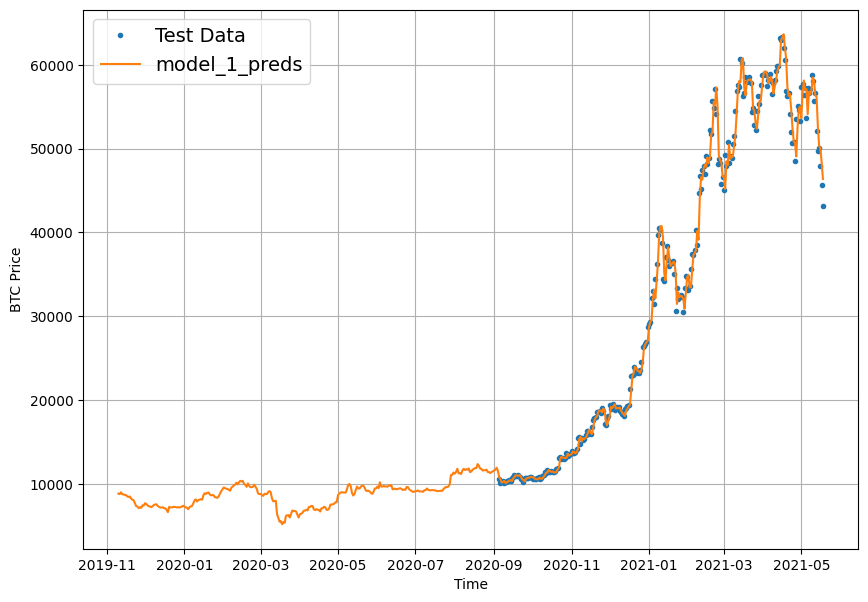

In [147]:
# let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct ploting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):],
                values=model_1_preds,
                format='-',
                label='model_1_preds')

**The model is lagging behind and the reason is Autocorretion in timeserise**
https://otexts.com/fpp3/acf.html

## Model 2: Dense(window=30,horizon=1)

In [148]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE=30 # use 30 timesteps in of past

In [149]:
# windowing our dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [150]:
# make train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2205, 552, 2205, 552)

In [151]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_2_dense')

# compile
model_2.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
           train_labels,
           epochs=100,
           batch_size=128,
           verbose=0,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


In [152]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 614.2909


614.2908935546875

In [153]:
# load the best performing model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 614.2909


614.2908935546875

In [154]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                            input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [155]:
test_labels.shape, model_2_preds.shape

((552, 1), TensorShape([552]))

In [156]:
# Evaluate results for model 2 predictions
model_2_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred = model_2_preds)
model_2_results

{'mae': 614.2909,
 'mse': 1276256.2,
 'rmse': 1129.7151,
 'mape': 2.8024292,
 'mase': 1.0737864}

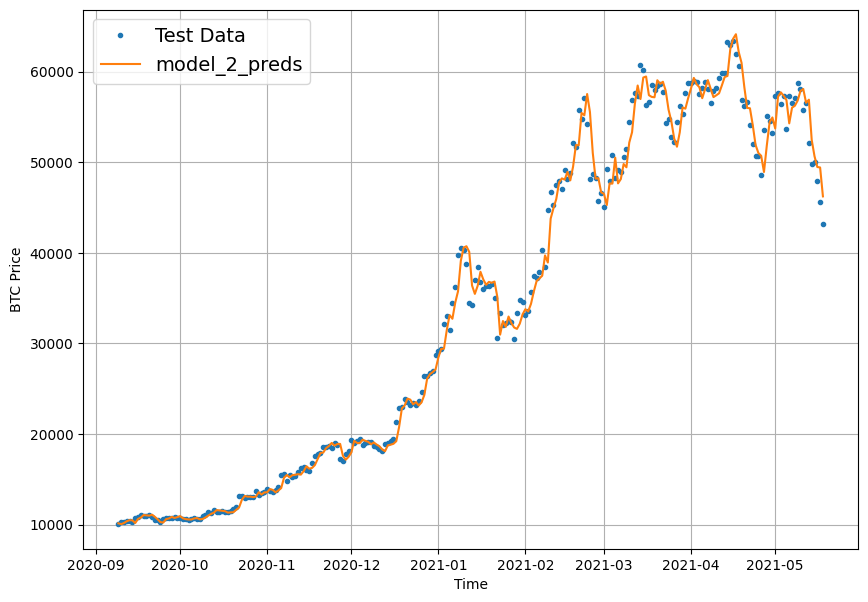

In [157]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds,start=offset, format='-', label='model_2_preds')

## Model 3: Dense (window = 30, horizon = 7)

In [158]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [159]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [160]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_3_dense')

# Compile
model_3.compile(loss='MAE',
               optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
           train_labels,
           batch_size=128,
           epochs=100,
           verbose=0,
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


In [161]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1308.7207


1308.720703125

In [162]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense')
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1231.5199


1231.5198974609375

In [163]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                          input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9260.364 , 9422.78  , 9402.783 , 9351.578 , 9295.157 , 9329.554 ,
        9745.73  ],
       [8927.771 , 9033.911 , 8968.631 , 8920.643 , 8878.208 , 8991.683 ,
        9317.4795],
       [8754.013 , 8740.51  , 8809.747 , 8777.514 , 9012.674 , 8966.45  ,
        9059.787 ],
       [8758.908 , 8733.584 , 9035.694 , 9006.077 , 9207.276 , 9303.636 ,
        9103.792 ],
       [8710.074 , 8936.554 , 9074.522 , 9013.496 , 9130.735 , 9074.865 ,
        9135.383 ]], dtype=float32)>

In [164]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [165]:
# Evaluate model_3 results
model_3_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_3_preds)
model_3_results

{'mae': 1231.52,
 'mse': 5256837.0,
 'rmse': 1409.5668,
 'mape': 5.497501,
 'mase': 2.1914208}

#### Visualizing the preedictions of model 3

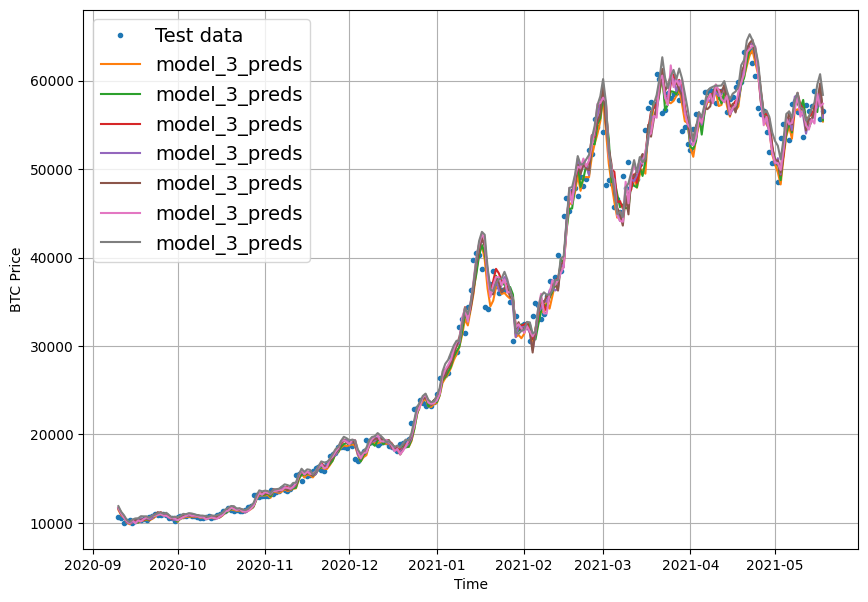

In [166]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset,format='-', label='model_3_preds')

### Till now let's see which model has performed better

<Axes: >

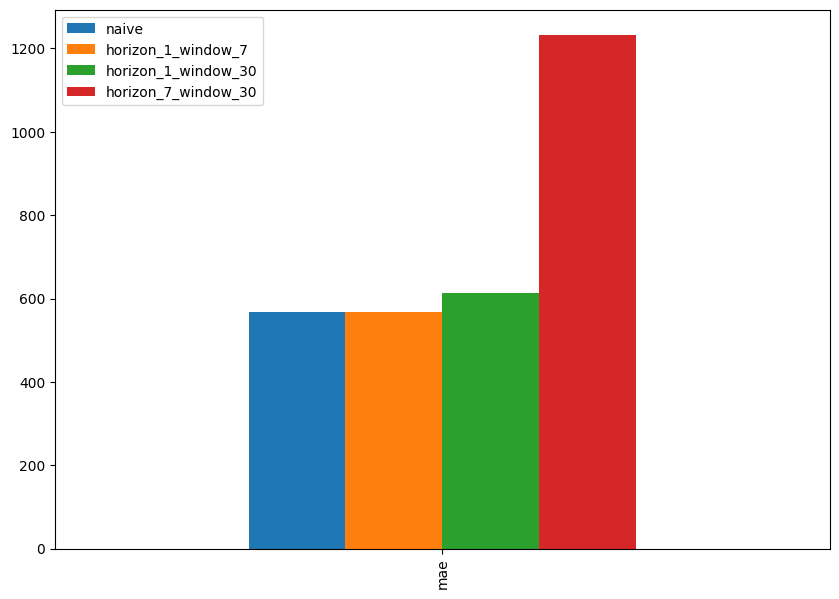

In [167]:
import pandas as pd
pd.DataFrame({'naive': naive_results['mae'],
             'horizon_1_window_7': model_1_results['mae'],
             'horizon_1_window_30': model_2_results['mae'],
             'horizon_7_window_30': model_3_results['mae']}, index=['mae']).plot(figsize=(10,7), kind = 'bar')

**For more understanding on Autocorrelated data**  [Read it](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)

## Model4: Conv1D

In [168]:
HORIZON = 1 # predict next day of Bitcoin price
WINDOW_SIZE = 7 # use previous week worth data

In [169]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [170]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

To use Conv1D layer,we need an input shape of (batch_size, timesteps, input_dims) 
However our data isn't in that shape yet

In [171]:
# Before we pass our data to the ConvD layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [172]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimentionality for `input_dim`

In [173]:
# Test out our lambda layer
print(f"Original shape: {x.shape}")# Window shape
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [174]:
tf.random.set_seed(42)

# create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_conv1D')

# Compile model
model_4.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam())

# Fit 
model_4.fit(train_windows,
           train_labels,
           batch_size=128,
           epochs=100,
           
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 1664.7626 INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 3s 101ms/step - loss: 1398.4762 - val_loss: 1393.3673
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 319.8982 - val_loss: 1638.0505
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 218.9243INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 73ms/step - loss: 215.0966 - val_loss: 1030.9966
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 186.6707INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 73ms/step - loss: 184.3944 - val_loss: 983.8527
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 176.3868 - val_loss: 985.0532
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 172.6230INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 2s 112ms/step - loss: 172.5012 - val_loss: 965.1389
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 177.8499INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 77ms/step - loss: 171.7803 - val_loss: 947.1031
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 168.4327 - val_loss: 949.5816
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 166.3790 - val_loss: 968.1730
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 162.4459INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 163.6723 - val_loss: 909.4736
Epoch 11/100
14/18 [======================>.......] - ETA: 0s - loss: 163.6868INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 161.1528 - val_loss: 894.6036
Epoch 12/100
18/18 [==============================] - 0s 8ms/step - loss: 158.8490 - val_loss: 939.9187
Epoch 13/100
18/18 [==============================] - 0s 10ms/step - loss: 156.9059 - val_loss: 911.8679
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 152.1868INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 70ms/step - loss: 153.8757 - val_loss: 880.3265
Epoch 15/100
15/18 [========================>.....] - ETA: 0s - loss: 156.4798INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 59ms/step - loss: 153.0984 - val_loss: 870.3312
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 147.1051INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 65ms/step - loss: 148.9621 - val_loss: 853.3173
Epoch 17/100
15/18 [========================>.....] - ETA: 0s - loss: 145.6653INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 82ms/step - loss: 147.4708 - val_loss: 836.2063
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 150.1668INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 69ms/step - loss: 145.3760 - val_loss: 822.1473
Epoch 19/100
16/18 [=========================>....] - ETA: 0s - loss: 142.9133INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 79ms/step - loss: 142.1402 - val_loss: 816.2814
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 140.0018INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 72ms/step - loss: 141.1488 - val_loss: 785.5922
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 147.1854INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 75ms/step - loss: 140.4688 - val_loss: 761.1154
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 144.4484INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 76ms/step - loss: 139.0639 - val_loss: 758.9896
Epoch 23/100
18/18 [==============================] - 0s 9ms/step - loss: 134.4630 - val_loss: 763.6119
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 151.4124INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 70ms/step - loss: 134.2480 - val_loss: 747.2816
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 135.3379INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 71ms/step - loss: 131.8990 - val_loss: 720.9778
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 134.7703INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 68ms/step - loss: 130.4176 - val_loss: 712.9839
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 128.7017INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 70ms/step - loss: 128.9932 - val_loss: 703.7056
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 123.3213INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 69ms/step - loss: 126.5899 - val_loss: 700.5046
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 125.3870INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 64ms/step - loss: 125.3870 - val_loss: 689.5941
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 128.2669 - val_loss: 815.3282
Epoch 31/100
18/18 [==============================] - 0s 9ms/step - loss: 136.9424 - val_loss: 786.8657
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 133.0269INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 59ms/step - loss: 130.2382 - val_loss: 685.6040
Epoch 33/100
14/18 [======================>.......] - ETA: 0s - loss: 125.6863INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 82ms/step - loss: 125.0603 - val_loss: 671.8112
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 127.1081INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 79ms/step - loss: 122.0722 - val_loss: 656.8776
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 119.9179 - val_loss: 657.0665
Epoch 36/100
18/18 [==============================] - 0s 9ms/step - loss: 124.0328 - val_loss: 723.5792
Epoch 37/100
14/18 [======================>.......] - ETA: 0s - loss: 123.3344INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 120.6663 - val_loss: 646.4268
Epoch 38/100
13/18 [====================>.........] - ETA: 0s - loss: 120.3349INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 73ms/step - loss: 118.4558 - val_loss: 638.5964
Epoch 39/100
18/18 [==============================] - 0s 10ms/step - loss: 121.8962 - val_loss: 727.4897
Epoch 40/100
12/18 [===================>..........] - ETA: 0s - loss: 123.4072INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 2s 116ms/step - loss: 119.7076 - val_loss: 629.7186
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 118.8846 - val_loss: 630.2892
Epoch 42/100
12/18 [===================>..........] - ETA: 0s - loss: 118.4311INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 76ms/step - loss: 119.1974 - val_loss: 625.1627
Epoch 43/100
18/18 [==============================] - 0s 9ms/step - loss: 115.5586 - val_loss: 628.0181
Epoch 44/100
18/18 [==============================] - 0s 9ms/step - loss: 117.6237 - val_loss: 639.5787
Epoch 45/100
15/18 [========================>.....] - ETA: 0s - loss: 116.4894INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 118.2765 - val_loss: 620.8362
Epoch 46/100
15/18 [========================>.....] - ETA: 0s - loss: 118.5945INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 115.5207 - val_loss: 612.3460
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 118.4691 - val_loss: 661.1167
Epoch 48/100
18/18 [==============================] - 0s 9ms/step - loss: 115.2434 - val_loss: 651.2722
Epoch 49/100
14/18 [======================>.......] - ETA: 0s - loss: 119.3135INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 67ms/step - loss: 119.2652 - val_loss: 608.4382
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2233 - val_loss: 612.4175
Epoch 51/100
18/18 [==============================] - 0s 8ms/step - loss: 113.3401 - val_loss: 619.4875
Epoch 52/100
18/18 [==============================] - 0s 9ms/step - loss: 115.8587 - val_loss: 608.6113
Epoch 53/100
14/18 [======================>.......] - ETA: 0s - loss: 117.5360INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 71ms/step - loss: 115.8552 - val_loss: 600.3132
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 112.7599 - val_loss: 612.7050
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 114.6000 - val_loss: 605.7249
Epoch 56/100
18/18 [==============================] - 0s 9ms/step - loss: 111.7299 - val_loss: 748.2959
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 126.9811 - val_loss: 707.0084
Epoch 58/100
18/18 [==============================] - 0s 9ms/step - loss: 123.8441 - val_loss: 647.7266
Epoch 59/100
18/18 [==============================] - 0s 8ms/step - loss: 111.3533 - val_loss: 602.2950
Epoch 60/100
18/18 [==============================] - 0s 9ms/step - loss: 112.1824 - val_loss: 631.6588
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 112.8556 - val_loss: 615.2399
Epoch 62/100
14/18 [======================>.......] - ETA: 0s - loss: 111.4

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 72ms/step - loss: 110.9925 - val_loss: 594.0091
Epoch 63/100
16/18 [=========================>....] - ETA: 0s - loss: 112.7461INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 81ms/step - loss: 112.2676 - val_loss: 586.5630
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 110.7376 - val_loss: 645.9002
Epoch 65/100
18/18 [==============================] - 0s 8ms/step - loss: 115.9921 - val_loss: 593.1370
Epoch 66/100
18/18 [==============================] - 0s 9ms/step - loss: 112.2809 - val_loss: 592.6337
Epoch 67/100
18/18 [==============================] - 0s 9ms/step - loss: 109.4915 - val_loss: 657.4014
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 116.3936 - val_loss: 698.3767
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 125.7508 - val_loss: 689.9838
Epoch 70/100
15/18 [========================>.....] - ETA: 0s - loss: 116.3278INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 71ms/step - loss: 118.4720 - val_loss: 585.8453
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7781 - val_loss: 612.6251
Epoch 72/100
18/18 [==============================] - 0s 9ms/step - loss: 111.5344 - val_loss: 599.0070
Epoch 73/100
18/18 [==============================] - 0s 9ms/step - loss: 110.5510 - val_loss: 588.8779
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 110.5713 - val_loss: 590.6490
Epoch 75/100
12/18 [===================>..........] - ETA: 0s - loss: 110.6203INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 75ms/step - loss: 109.9126 - val_loss: 579.1190
Epoch 76/100
13/18 [====================>.........] - ETA: 0s - loss: 110.0277INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 109.6023 - val_loss: 576.7447
Epoch 77/100
15/18 [========================>.....] - ETA: 0s - loss: 112.1224INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 79ms/step - loss: 109.4200 - val_loss: 576.4318
Epoch 78/100
18/18 [==============================] - 0s 9ms/step - loss: 109.6628 - val_loss: 576.9278
Epoch 79/100
18/18 [==============================] - 0s 9ms/step - loss: 110.1186 - val_loss: 599.3710
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 110.1934 - val_loss: 577.1664
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 109.3351 - val_loss: 585.4059
Epoch 82/100
18/18 [==============================] - 0s 9ms/step - loss: 114.8046 - val_loss: 579.3713
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 110.8850 - val_loss: 646.5897
Epoch 84/100
15/18 [========================>.....] - ETA: 0s - loss: 110.8503INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 71ms/step - loss: 112.2616 - val_loss: 575.7097
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 108.1240 - val_loss: 583.0137
Epoch 86/100
18/18 [==============================] - 0s 9ms/step - loss: 108.9355 - val_loss: 612.3485
Epoch 87/100
18/18 [==============================] - 0s 9ms/step - loss: 111.5971 - val_loss: 577.3603
Epoch 88/100
18/18 [==============================] - 0s 8ms/step - loss: 109.3063 - val_loss: 592.1984
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7535 - val_loss: 586.8507
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 107.3504 - val_loss: 650.7299
Epoch 91/100
18/18 [==============================] - 0s 10ms/step - loss: 111.3345 - val_loss: 606.7880
Epoch 92/100
15/18 [========================>.....] - ETA: 0s - loss: 109.5285INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 61ms/step - loss: 110.1977 - val_loss: 572.1055
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 113.5599 - val_loss: 620.1992
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 110.6223 - val_loss: 572.6130
Epoch 95/100
18/18 [==============================] - 0s 9ms/step - loss: 109.9696 - val_loss: 587.4180
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 113.1631 - val_loss: 575.7296
Epoch 97/100
18/18 [==============================] - 0s 9ms/step - loss: 108.4605 - val_loss: 580.2859
Epoch 98/100
16/18 [=========================>....] - ETA: 0s - loss: 110.1392INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 56ms/step - loss: 108.5984 - val_loss: 571.0452
Epoch 99/100
15/18 [========================>.....] - ETA: 0s - loss: 107.1182INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


18/18 [==============================] - 1s 72ms/step - loss: 108.1951 - val_loss: 569.1138
Epoch 100/100
18/18 [==============================] - 0s 9ms/step - loss: 111.5761 - val_loss: 637.9821


In [175]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_11 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [176]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 637.9821


637.9820556640625

In [177]:
# load back in the best performing Conv1D and re-evaluate it
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 569.1137


569.1137084960938

In [178]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8895.162, 8797.445, 9014.376, 8788.345, 8757.896, 8758.595,
       8681.349, 8544.3  , 8476.035, 8526.968], dtype=float32)>

In [179]:
# Evaluate the predictions
model_4_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_4_preds)
model_4_results

{'mae': 569.1137,
 'mse': 1178525.8,
 'rmse': 1085.5992,
 'mape': 2.5454433,
 'mase': 0.9997752}

## Model 5: RNN(LSTM)
Building an RNN model for our time serise data.
Takes the input as [batch, timesteps, feature]

In [180]:
tf.random.set_seed(42)

# Let's build an LSTM model with functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name='model_5_LSTM')

# Compile
model_5.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
           train_labels,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 2747.8267 INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 7s 217ms/step - loss: 2419.5310 - val_loss: 8653.5449
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 890.4664 INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 213ms/step - loss: 671.0231 - val_loss: 1907.5334
Epoch 3/100
10/18 [===============>..............] - ETA: 0s - loss: 236.4218INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 177ms/step - loss: 226.1201 - val_loss: 1167.7505
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 179.6932INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 193ms/step - loss: 178.0102 - val_loss: 1019.4231
Epoch 5/100
 9/18 [==============>...............] - ETA: 0s - loss: 184.4331INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 181ms/step - loss: 171.1153 - val_loss: 984.6666
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 166.3387INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 185ms/step - loss: 169.7315 - val_loss: 945.3786
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 170.7955 - val_loss: 981.2051
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 164.1698INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 185ms/step - loss: 167.4038 - val_loss: 938.4146
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 165.2083 - val_loss: 949.5407
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 159.1730INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 178ms/step - loss: 163.5076 - val_loss: 915.3136
Epoch 11/100
11/18 [=================>............] - ETA: 0s - loss: 169.1231INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 185ms/step - loss: 162.0233 - val_loss: 901.4828
Epoch 12/100
18/18 [==============================] - 0s 11ms/step - loss: 161.2512 - val_loss: 923.0626
Epoch 13/100
18/18 [==============================] - 0s 10ms/step - loss: 159.6302 - val_loss: 940.0570
Epoch 14/100
18/18 [==============================] - 0s 11ms/step - loss: 157.6023 - val_loss: 914.3900
Epoch 15/100
10/18 [===============>..............] - ETA: 0s - loss: 157.1354INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 226ms/step - loss: 158.6802 - val_loss: 878.3506
Epoch 16/100
 9/18 [==============>...............] - ETA: 0s - loss: 153.7639INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 198ms/step - loss: 153.4805 - val_loss: 874.6932
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 152.1806 - val_loss: 918.1585
Epoch 18/100
18/18 [==============================] - 0s 11ms/step - loss: 151.1244 - val_loss: 882.8204
Epoch 19/100
11/18 [=================>............] - ETA: 0s - loss: 154.2814INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 164ms/step - loss: 148.0937 - val_loss: 867.3907
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 150.8853INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 186ms/step - loss: 148.1929 - val_loss: 817.4843
Epoch 21/100
18/18 [==============================] - 0s 10ms/step - loss: 145.7373 - val_loss: 820.6736
Epoch 22/100
18/18 [==============================] - 0s 11ms/step - loss: 143.5760 - val_loss: 820.8073
Epoch 23/100
18/18 [==============================] - 0s 12ms/step - loss: 142.8257 - val_loss: 830.2073
Epoch 24/100
10/18 [===============>..............] - ETA: 0s - loss: 139.8197INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 198ms/step - loss: 142.2280 - val_loss: 801.1842
Epoch 25/100
13/18 [====================>.........] - ETA: 0s - loss: 142.1714INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 187ms/step - loss: 138.9271 - val_loss: 770.5001
Epoch 26/100
18/18 [==============================] - 0s 11ms/step - loss: 137.7911 - val_loss: 774.4352
Epoch 27/100
18/18 [==============================] - 0s 11ms/step - loss: 136.4490 - val_loss: 776.6688
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 135.8754INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 190ms/step - loss: 135.8754 - val_loss: 755.4147
Epoch 29/100
18/18 [==============================] - 0s 12ms/step - loss: 137.0420 - val_loss: 762.7026
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 138.1095 - val_loss: 828.9813
Epoch 31/100
12/18 [===================>..........] - ETA: 0s - loss: 137.7584INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 210ms/step - loss: 136.3601 - val_loss: 723.8940
Epoch 32/100
18/18 [==============================] - 0s 10ms/step - loss: 130.3134 - val_loss: 743.7419
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 128.9780 - val_loss: 729.8751
Epoch 34/100
10/18 [===============>..............] - ETA: 0s - loss: 131.6337INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 196ms/step - loss: 128.6385 - val_loss: 705.9429
Epoch 35/100
10/18 [===============>..............] - ETA: 0s - loss: 125.8403INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 207ms/step - loss: 126.6242 - val_loss: 702.0682
Epoch 36/100
11/18 [=================>............] - ETA: 0s - loss: 129.9639INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 200ms/step - loss: 129.7055 - val_loss: 697.5437
Epoch 37/100
10/18 [===============>..............] - ETA: 0s - loss: 117.9766INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 183ms/step - loss: 125.8731 - val_loss: 695.1359
Epoch 38/100
10/18 [===============>..............] - ETA: 0s - loss: 130.8073INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 203ms/step - loss: 124.1072 - val_loss: 680.7138
Epoch 39/100
18/18 [==============================] - 0s 11ms/step - loss: 124.1400 - val_loss: 717.9666
Epoch 40/100
18/18 [==============================] - 0s 12ms/step - loss: 127.2343 - val_loss: 716.7807
Epoch 41/100
11/18 [=================>............] - ETA: 0s - loss: 130.2284INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 199ms/step - loss: 123.8181 - val_loss: 678.2358
Epoch 42/100
10/18 [===============>..............] - ETA: 0s - loss: 117.6484INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 213ms/step - loss: 123.1559 - val_loss: 660.6390
Epoch 43/100
11/18 [=================>............] - ETA: 0s - loss: 114.7471INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 229ms/step - loss: 121.4523 - val_loss: 656.2863
Epoch 44/100
10/18 [===============>..............] - ETA: 0s - loss: 117.6980INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 184ms/step - loss: 122.6406 - val_loss: 655.0035
Epoch 45/100
11/18 [=================>............] - ETA: 0s - loss: 119.7469INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 191ms/step - loss: 119.9958 - val_loss: 653.0371
Epoch 46/100
10/18 [===============>..............] - ETA: 0s - loss: 126.6165INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 185ms/step - loss: 119.6842 - val_loss: 645.5645
Epoch 47/100
18/18 [==============================] - 0s 10ms/step - loss: 120.2025 - val_loss: 656.9493
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 118.4374INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 188ms/step - loss: 119.7568 - val_loss: 640.4421
Epoch 49/100
18/18 [==============================] - 0s 11ms/step - loss: 118.0783 - val_loss: 644.5593
Epoch 50/100
17/18 [===========================>..] - ETA: 0s - loss: 118.7058INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 172ms/step - loss: 118.6259 - val_loss: 634.5610
Epoch 51/100
18/18 [==============================] - 0s 11ms/step - loss: 117.0975 - val_loss: 672.9993
Epoch 52/100
10/18 [===============>..............] - ETA: 0s - loss: 121.9826INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 169ms/step - loss: 117.2885 - val_loss: 629.8624
Epoch 53/100
18/18 [==============================] - 0s 12ms/step - loss: 117.4165 - val_loss: 631.3657
Epoch 54/100
18/18 [==============================] - 0s 11ms/step - loss: 118.8098 - val_loss: 647.9791
Epoch 55/100
18/18 [==============================] - 0s 11ms/step - loss: 116.7004 - val_loss: 632.4716
Epoch 56/100
18/18 [==============================] - 0s 10ms/step - loss: 117.5554 - val_loss: 635.6898
Epoch 57/100
18/18 [==============================] - 0s 11ms/step - loss: 124.3969 - val_loss: 635.1415
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 115.9898INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 227ms/step - loss: 115.9898 - val_loss: 620.7851
Epoch 59/100
11/18 [=================>............] - ETA: 0s - loss: 112.1254INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 192ms/step - loss: 114.6510 - val_loss: 615.7648
Epoch 60/100
18/18 [==============================] - 0s 11ms/step - loss: 114.2193 - val_loss: 618.3925
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 115.1167 - val_loss: 635.1562
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 115.2185 - val_loss: 616.3715
Epoch 63/100
10/18 [===============>..............] - ETA: 0s - loss: 128.1202INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 187ms/step - loss: 117.1769 - val_loss: 614.3654
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 113.5571 - val_loss: 663.8904
Epoch 65/100
18/18 [==============================] - 0s 10ms/step - loss: 116.6204 - val_loss: 615.7017
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 113.8117 - val_loss: 617.3265
Epoch 67/100
10/18 [===============>..............] - ETA: 0s - loss: 110.5866INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 176ms/step - loss: 115.8480 - val_loss: 612.0792
Epoch 68/100
18/18 [==============================] - 0s 11ms/step - loss: 116.5289 - val_loss: 613.2158
Epoch 69/100
18/18 [==============================] - 0s 12ms/step - loss: 118.9996 - val_loss: 632.9169
Epoch 70/100
10/18 [===============>..............] - ETA: 0s - loss: 117.2616INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 197ms/step - loss: 115.4928 - val_loss: 603.7195
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 112.9797 - val_loss: 611.7181
Epoch 72/100
10/18 [===============>..............] - ETA: 0s - loss: 114.2303INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 203ms/step - loss: 114.3276 - val_loss: 599.9650
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 112.0965 - val_loss: 605.2585
Epoch 74/100
18/18 [==============================] - 0s 11ms/step - loss: 112.4475 - val_loss: 600.0179
Epoch 75/100
18/18 [==============================] - 0s 11ms/step - loss: 113.5939 - val_loss: 672.0353
Epoch 76/100
18/18 [==============================] - 0s 11ms/step - loss: 115.0031 - val_loss: 617.5901
Epoch 77/100
18/18 [==============================] - 0s 10ms/step - loss: 115.5891 - val_loss: 670.9554
Epoch 78/100
18/18 [==============================] - 0s 11ms/step - loss: 117.1367 - val_loss: 651.7233
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 114.1770INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 179ms/step - loss: 113.6569 - val_loss: 594.5060
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 111.3181 - val_loss: 600.4442
Epoch 81/100
18/18 [==============================] - 0s 10ms/step - loss: 112.1218 - val_loss: 607.6138
Epoch 82/100
18/18 [==============================] - 0s 10ms/step - loss: 114.0730 - val_loss: 595.0349
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 112.5087 - val_loss: 609.8987
Epoch 84/100
18/18 [==============================] - 0s 11ms/step - loss: 112.5720 - val_loss: 601.2283
Epoch 85/100
18/18 [==============================] - 0s 10ms/step - loss: 110.9517 - val_loss: 602.0983
Epoch 86/100
18/18 [==============================] - 0s 10ms/step - loss: 113.2202 - val_loss: 639.6197
Epoch 87/100
10/18 [===============>..............] - ETA: 0s - loss: 120.5846INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 161ms/step - loss: 114.2578 - val_loss: 588.6749
Epoch 88/100
18/18 [==============================] - 0s 10ms/step - loss: 110.8043 - val_loss: 589.5083
Epoch 89/100
18/18 [==============================] - 0s 11ms/step - loss: 110.5020 - val_loss: 617.9712
Epoch 90/100
18/18 [==============================] - 0s 10ms/step - loss: 114.7794 - val_loss: 712.3768
Epoch 91/100
18/18 [==============================] - 0s 10ms/step - loss: 118.3579 - val_loss: 614.2927
Epoch 92/100
18/18 [==============================] - ETA: 0s - loss: 112.1328INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 4s 238ms/step - loss: 112.1328 - val_loss: 586.2524
Epoch 93/100
18/18 [==============================] - 0s 11ms/step - loss: 112.8235 - val_loss: 641.4774
Epoch 94/100
18/18 [==============================] - 0s 10ms/step - loss: 112.5116 - val_loss: 600.6862
Epoch 95/100
18/18 [==============================] - 0s 10ms/step - loss: 110.0285 - val_loss: 596.7131
Epoch 96/100
18/18 [==============================] - 0s 12ms/step - loss: 110.9046 - val_loss: 594.4503
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 110.3976 - val_loss: 619.1088
Epoch 98/100
18/18 [==============================] - ETA: 0s - loss: 110.7328INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 188ms/step - loss: 110.7328 - val_loss: 585.5547
Epoch 99/100
 9/18 [==============>...............] - ETA: 0s - loss: 109.0721INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 191ms/step - loss: 110.0438 - val_loss: 583.3709
Epoch 100/100
18/18 [==============================] - 0s 11ms/step - loss: 114.4642 - val_loss: 590.4974


In [181]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 583.3708


583.370849609375

In [182]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8955.415, 8813.9  , 8986.828, 8817.942, 8773.094], dtype=float32)>

In [183]:
# Evaluate model_5 predictions
model_5_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_5_preds)
model_5_results

{'mae': 583.37085,
 'mse': 1226427.5,
 'rmse': 1107.4419,
 'mape': 2.6241102,
 'mase': 1.024821}

**Note** Here our model_1 performs better than our LSTM model


#### make a multivarient(two or more features) time serise data
Before we add a feature to our time series, what is a feature we can use?

In [184]:
# Let's make a multivarient time serises
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


**Let's add the bitcoin having as our features-->** [link of the resource from where we get the data](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving)

In [185]:
# Let's add the bitcoin having events to our dataset
block_reward_1 = 50 # 3 Jan 2009 - this block reward isn't in our dataset(our data starts from 01 oct 2013)
block_reward_2 = 25 # 28 Nov 2012
block_reward_3 = 12.5 # 9th Jul 2016
block_reward_4 = 6.25 # 18th may 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')


In [186]:
# Create dates ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [187]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Add in block reward values as a feature to our dataset
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days: block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days: ,-1] = block_reward_4

In [188]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


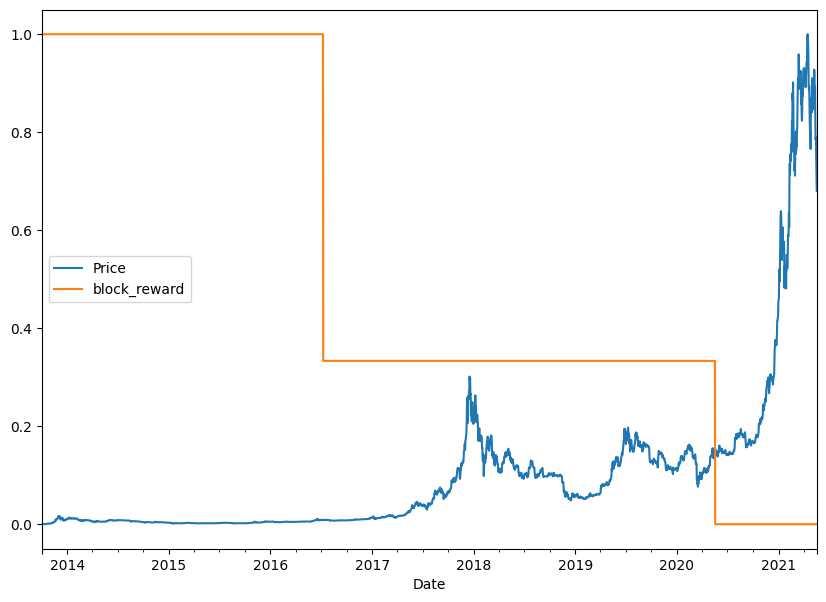

In [189]:

# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));
     

### Making windowed dataset for multivarient time serise data with Pandas
We hv created make_window function to window our univatient timeserise data.
So using pandas.DataFrame.shift() method to window our multivarient timeserise dataset

In [190]:
HORIZON = 1
WINDOW_SIZE = 7

In [191]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
    # Here a new column is being created
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [192]:
X = bitcoin_prices_windowed.dropna().drop('Price',axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [193]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [194]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [195]:
# Making the train test split
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

### Model 6: Dense (Multivariate time serise)

In [196]:
tf.random.set_seed(42)

# Make multivariate time serise model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    #layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_6_multivariate')

model_6.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,y_train,
           epochs=100,
           batch_size=128,
           verbose=1,
           validation_data=(X_test, y_test),
           callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 1928.4750 INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 2s 69ms/step - loss: 1713.9807 - val_loss: 1048.2701
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 341.7546 - val_loss: 1832.3510
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 206.3845 - val_loss: 1095.7731
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 196.7461INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 51ms/step - loss: 164.0382 - val_loss: 913.9593
Epoch 5/100
15/18 [========================>.....] - ETA: 0s - loss: 157.9269INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 60ms/step - loss: 155.4769 - val_loss: 858.0335
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 154.7354 - val_loss: 862.8947
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 150.0179 - val_loss: 859.9189
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 126.1086INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 57ms/step - loss: 146.9410 - val_loss: 800.6097
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 145.3993 - val_loss: 846.8910
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 157.2099INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 60ms/step - loss: 143.1381 - val_loss: 776.2603
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 149.8375INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 56ms/step - loss: 138.9644 - val_loss: 766.4005
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 136.4975 - val_loss: 815.0215
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 107.5989INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 61ms/step - loss: 136.4669 - val_loss: 763.0300
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 132.9526 - val_loss: 768.9296
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 132.2744INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 55ms/step - loss: 131.9953 - val_loss: 738.8484
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 128.2675 - val_loss: 741.1103
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 127.8529 - val_loss: 741.2354
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 140.3844INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 61ms/step - loss: 128.3367 - val_loss: 708.8014
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 123.8710 - val_loss: 729.3587
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 142.5822INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 61ms/step - loss: 126.8717 - val_loss: 677.6174
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 146.5454INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 52ms/step - loss: 127.5375 - val_loss: 670.7720
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 172.2745INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 47ms/step - loss: 123.9836 - val_loss: 665.8009
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 122.0556 - val_loss: 668.3813
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 126.3799INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 53ms/step - loss: 119.1622 - val_loss: 656.3303
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 129.4296INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 56ms/step - loss: 118.9011 - val_loss: 648.5168
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 120.1301 - val_loss: 655.4786
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 175.3959INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 58ms/step - loss: 118.9046 - val_loss: 640.2248
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 106.6861INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 56ms/step - loss: 117.1047 - val_loss: 639.8981
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 115.9553 - val_loss: 651.3448
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 120.8739 - val_loss: 698.4576
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 131.1852 - val_loss: 901.3579
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 154.6567INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 62ms/step - loss: 133.5933 - val_loss: 626.9666
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 122.3194 - val_loss: 639.0228
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 119.0869INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 59ms/step - loss: 119.5107 - val_loss: 621.1376
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 117.7052 - val_loss: 632.3109
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 121.3061 - val_loss: 699.5287
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 151.7869INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 2s 109ms/step - loss: 117.4355 - val_loss: 614.2186
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 102.7021INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 64ms/step - loss: 113.5789 - val_loss: 612.7061
Epoch 39/100
18/18 [==============================] - 0s 8ms/step - loss: 113.7692 - val_loss: 636.6857
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 108.6991INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 60ms/step - loss: 112.4036 - val_loss: 609.6126
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4965 - val_loss: 620.3348
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5420 - val_loss: 611.2324
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 113.0833 - val_loss: 621.1238
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 115.4839 - val_loss: 622.6166
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1258 - val_loss: 618.0131
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 84.9957INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 59ms/step - loss: 113.4002 - val_loss: 604.7596
Epoch 47/100
18/18 [==============================] - 0s 11ms/step - loss: 112.4278 - val_loss: 672.8750
Epoch 48/100
18/18 [==============================] - 0s 9ms/step - loss: 112.0967 - val_loss: 605.6071
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 111.6146 - val_loss: 655.0206
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 119.4594 - val_loss: 630.2352
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 96.2149INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 47ms/step - loss: 111.9167 - val_loss: 598.8906
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 112.6981 - val_loss: 601.7477
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 113.0026 - val_loss: 638.5011
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3181 - val_loss: 613.7902
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 130.9059INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 41ms/step - loss: 113.2849 - val_loss: 596.9316
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6297 - val_loss: 759.1713
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 127.6055 - val_loss: 723.5320
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 123.7304 - val_loss: 702.7465
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6777 - val_loss: 660.8560
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 113.6769 - val_loss: 634.2477
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 111.1832 - val_loss: 623.4685
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 110.5144 - val_loss: 601.5391
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2172 - val_loss: 624.4919
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 46ms/step - loss: 109.8681 - val_loss: 586.1758
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 109.8229 - val_loss: 588.3182
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 108.4504 - val_loss: 653.2943
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 117.3878 - val_loss: 715.9259
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 126.1862 - val_loss: 669.4245
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 120.6269 - val_loss: 590.4729
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 111.6376 - val_loss: 613.3196
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 109.0859 - val_loss: 589.1072
Epoch 73/100
18/18 [==============================] - 0s 8ms/step - loss: 111.3592 - val_loss: 592.0144
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 58ms/step - loss: 109.4307 - val_loss: 585.6230
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 108.8772 - val_loss: 586.2864
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 85.5458INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 52ms/step - loss: 109.7133 - val_loss: 584.7640
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 110.6640INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 62ms/step - loss: 109.7324 - val_loss: 580.3875
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4836 - val_loss: 629.8553
Epoch 80/100
18/18 [==============================] - 0s 8ms/step - loss: 111.4526 - val_loss: 582.6196
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 107.0748 - val_loss: 581.7574
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 196.4767INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 55ms/step - loss: 114.0499 - val_loss: 580.3644
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 112.7952 - val_loss: 693.8453
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2136 - val_loss: 588.3391
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 108.4214 - val_loss: 622.1952
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 107.8373 - val_loss: 587.4396
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 107.9009 - val_loss: 590.6338
Epoch 88/100
 1/18 [>.............................] - ETA: 0s - loss: 131.0754INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 57ms/step - loss: 108.2431 - val_loss: 579.6743
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 106.5225 - val_loss: 582.1559
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 108.4881 - val_loss: 628.0475
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9594 - val_loss: 686.9256
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 109.4415 - val_loss: 586.6849
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4556 - val_loss: 619.2892
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 108.8443 - val_loss: 591.2239
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 135.1479INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 57ms/step - loss: 106.1628 - val_loss: 578.5797
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 107.8007 - val_loss: 633.4272
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6427 - val_loss: 599.2922
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 117.9373INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 60ms/step - loss: 107.8355 - val_loss: 578.2019
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 151.5163INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_multivariate\assets


18/18 [==============================] - 1s 52ms/step - loss: 107.3253 - val_loss: 575.6028
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6576 - val_loss: 626.2362


In [197]:
# Evaluate the multivarient model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 626.2363


626.2362670898438

In [198]:
# Load in and evaluate the best performing model
model_6 = tf.keras.models.load_model('model_experiments/model_6_multivariate')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 575.6028


575.6028442382812

In [199]:
# Make predictions with our model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8885.033, 8773.945, 9045.342, 8795.061, 8712.226, 8789.687,
       8684.999, 8519.423, 8479.887, 8534.259], dtype=float32)>

In [200]:
# Evaluating the predictions of model_6 
model_6_results = evaluation_preds(y_true=y_test,
                                  y_pred=model_6_preds)

In [201]:
model_6_results

{'mae': 575.60284,
 'mse': 1191545.8,
 'rmse': 1091.5795,
 'mape': 2.5662773,
 'mase': 1.0111748}

## Model 7: N-BEATS algorithm

Time to step things up a notch.

So far we've tried a bunch of smaller models, models with only a couple of layers.

But one of the best ways to improve a model's performance is to increase the number of layers in it.

That's exactly what the [N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting) algorithm](https://arxiv.org/pdf/1905.10437.pdf) does.

The N-BEATS algorithm focuses on univariate time series problems and achieved state-of-the-art performance in the winner of the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) (a forecasting competition).

For our next modelling experiment we're going to be replicating the **generic architecture** of the N-BEATS algorithm (see [section 3.3 of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)).

We're not going to go through all of the details in the paper, instead we're going to focus on:
1. Replicating the model architecture in [Figure 1 of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf) 

![figure 1 from N-BBEATS paper, the algorithm we're going to build](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-figure-1-nbeats-paper-annotated.png)
*N-BEATS algorithm we're going to replicate with TensorFlow with window (input) and horizon (output) annotations.*

2. Using the same hyperparameters as the paper which can be found in [Appendix D of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)

Doing this will give us an opportunity to practice:
* Creating a custom layer for the `NBeatsBlock` by subclassing [`tf.keras.layers.Layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
  * Creating a custom layer is helpful for when TensorFlow doesn't already have an existing implementation of a layer or if you'd like to make a layer configuration repeat a number of times (e.g. like a stack of N-BEATS blocks)
* Implementing a custom architecture using the Functional API 
* Finding a paper related to our problem and seeing how it goes 

> 🔑 **Note:** As you'll see in the paper, the authors state “N-BEATS is implemented and trained in TensorFlow”, that's what we'll be doing too!
's what we'll be doing too!


##### Creating NBeat Block Layer

Let's test our NBeatsBlock class.
To do we'll make some dummy input and outputs.

In [202]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [203]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [204]:

# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [205]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.5533004   0.72327375 -0.5070045  -0.25292417  0.32830235  0.05523893
  0.13186653]
Forecast: -0.03526943922042847


### Preparing data for N-BEATS algorithm using `tf.data`

In [206]:
HORIZON = 1
WINDOW_SIZE = 7

##### Create NBEATS data input (NBEATS works with univariate time serises)

In [207]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [208]:
# Make features and Labels
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test set
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [209]:
# Making our dataset performant using tf.data API
train_features_dataset =  tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset =  tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset =  tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch 
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for NBEATS algorithm
**Considering the Table 18 of the research paper**

In [210]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512 # in paper it is refered as width. Width means the no of neurons in a layer. Depth represent no of layers
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

#### Residual connection

We need two layers for our residual connections
* tf.keras.layers.Add
* tf.keras.layers.substract

In [211]:
# make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Substract
subtracted = layers.subtract([tensor_1,tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted : {subtracted.numpy()}")
print(f"Added : {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted : [10 10 10 10 10 10 10 10 10 10]
Added : [10 12 14 16 18 20 22 24 26 28]


In [212]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>)

### Building, compiling and fitting N-BEATS algorithm

1. Setup an instance of N-BEATS block layer using `NBeatsBlock`
2. Create an input layer for N-BEATS stack (using functional API)
3. Make initial backcast and forecasts for the model with the layers created in (1)
4. Use for loops to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcaste and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings
9. Fit the N-BEATS algo for 5000 epochs and usesome callbacks
    * Earlystopping - becoz the model will be training for so long, we'll stop it early if it stops improving
    * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (takes smaller steps towards best performance)

In [213]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons=N_NEURONS,
                                n_layers=N_LAYERS,
                                name="InitialBlock")

# 2. Create input layer to pass through stack
stack_input = layers.Input(shape=(INPUT_SIZE),
                          name = 'stack_input')

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
    # To do this we need to pass the data to the nbeats_block_layer
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layer
for i,_ in enumerate(range(N_STACKS-1)):

    #5. Use NBeatBlock to calculate the backcaste as well as the forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass in the residuals

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast])
    forecast = layers.add([forecast,block_forecast])

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_7_NBEATS')

# 8. Compile model with MAE loss
model_7.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
           epochs=N_EPOCHS,
           validation_data=test_dataset,
           verbose=1,
           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=200,
                                                      restore_best_weights=True),
                     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                         patience=100,
                                                         verbose=1)])

Epoch 1/5000
3/3 [==============================] - 59s 3s/step - loss: 3499.7161 - val_loss: 14943.9941 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 3s 1s/step - loss: 2618.0630 - val_loss: 13550.5381 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 3s 1s/step - loss: 2825.7920 - val_loss: 20056.8594 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 3s 1s/step - loss: 3125.0215 - val_loss: 14537.9141 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 3s 1s/step - loss: 1901.1130 - val_loss: 1076.8083 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 3s 1s/step - loss: 1275.8943 - val_loss: 1908.1423 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 3s 1s/step - loss: 752.3636 - val_loss: 3746.6343 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 3s 1s/step - loss: 895.2552 - val_loss: 2518.1050 - lr: 0.0010
Epoch 9/5000
3/3 [==============================] - 3s 998ms/step - l

In [214]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 254ms/step - loss: 571.7951


571.7951049804688

In [215]:
# Make prediction with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8836.051, 8764.996, 9022.833, 8768.788, 8737.936, 8741.02 ,
       8654.107, 8500.621, 8460.574, 8508.37 ], dtype=float32)>

In [216]:
# Evaluate N-BEATS model preds
model_7_results = evaluation_preds(y_true=y_test,
                                  y_pred=model_7_preds)
model_7_results

{'mae': 571.7951,
 'mse': 1171073.4,
 'rmse': 1082.1614,
 'mape': 2.5833561,
 'mase': 1.0044856}

### Ploting the N-BEATS architecture we've created

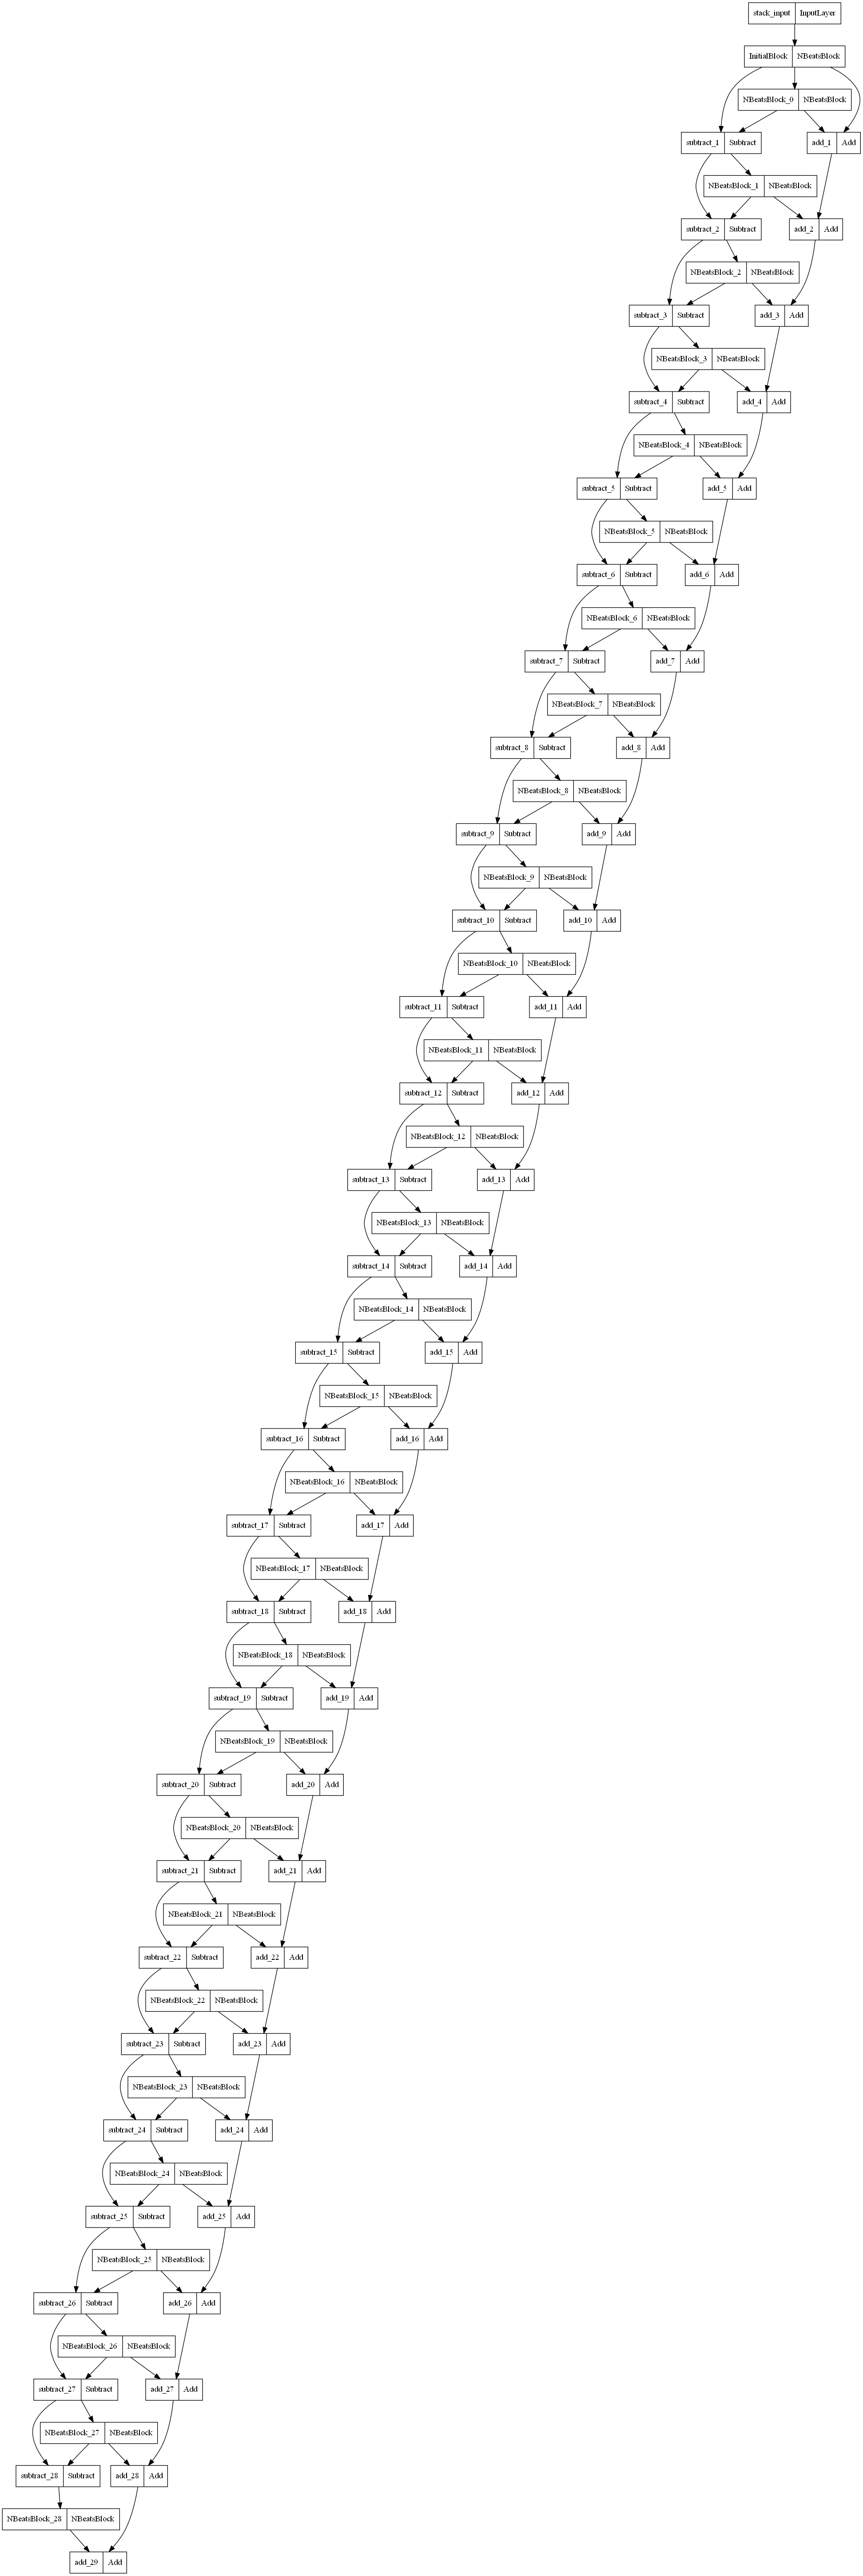

In [217]:
# Plot the N-Beats model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating Ensemble(Stacking multiple models together)

**Ensemble means combining multiple different models together and each model has the goal of predicting a common goal**

#### Constructing and fitting an ensemble of models (using different loss functions)

In [218]:
def get_ensemble_models(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data=test_dataset,
                       num_iter=10,
                       num_epochs=1000,
                       loss_fns=['mae','mse','mape']):
    '''
    Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
    for ex if num_iter=10 a list of 30 trained models will be returned 10 * len(['mae','mse','mape'])
    '''
    # Make empty list for trained ensemble models
    ensembele_models = []
    # create num_iter number of models per loss function
    for i in range(num_iter):
        # Build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number {i}")

            # Construct a simple model (similar to model_1)
            model = tf.keras.Sequential([
                layers.Dense(128,kernel_initializer='he_normal', activation='relu'),
                layers.Dense(128,kernel_initializer='he_normal', activation='relu'),
                layers.Dense(HORIZON)
            ])

            # compile simple model with current loss function
            model.compile(loss=loss_function,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['mae','mse'])
            # Fit the current model
            model.fit(train_data,
                     epochs=num_epochs,
                     verbose=0,
                     validation_data=test_data,
                     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=200,
                                                                restore_best_weights=True),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                   patience=100,
                                                                   verbose=0)])
            # Append fitted model to list of ensemble models
            ensembele_models.append(model)

    return ensembele_models

In [219]:
%%time
# Get the list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                     num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number 0
Optimizing model by reducing: mse for 1000 epochs, model number 0
Optimizing model by reducing: mape for 1000 epochs, model number 0
Optimizing model by reducing: mae for 1000 epochs, model number 1
Optimizing model by reducing: mse for 1000 epochs, model number 1
Optimizing model by reducing: mape for 1000 epochs, model number 1
Optimizing model by reducing: mae for 1000 epochs, model number 2
Optimizing model by reducing: mse for 1000 epochs, model number 2
Optimizing model by reducing: mape for 1000 epochs, model number 2
Optimizing model by reducing: mae for 1000 epochs, model number 3
Optimizing model by reducing: mse for 1000 epochs, model number 3
Optimizing model by reducing: mape for 1000 epochs, model number 3
Optimizing model by reducing: mae for 1000 epochs, model number 4
Optimizing model by reducing: mse for 1000 epochs, model number 4
Optimizing model by reducing: mape for 1000 epochs, model number 4
CPU t

In [220]:
len(ensemble_models)

15

In [221]:
ensemble_models

In [222]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

**Create a list of ensemble predictions**

In [223]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models, data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 66ms/step
CPU times: total: 406 ms
Wall time: 1.02 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8751.064,  8780.874,  9140.152, ..., 50381.79 , 48408.164,
        46337.402],
       [ 8749.133,  8763.249,  9092.045, ..., 49727.95 , 48775.133,
        46138.785],
       [ 8796.952,  8800.632,  9052.204, ..., 49672.996, 48500.76 ,
        45646.87 ],
       ...,
       [ 8831.671,  8819.729,  9117.674, ..., 50398.785, 48886.168,
        46157.684],
       [ 8768.895,  8823.329,  9104.605, ..., 50442.55 , 48106.38 ,
        46011.785],
       [ 8814.048,  8803.422,  9007.136, ..., 50268.066, 48432.84 ,
        46414.523]], dtype=float32)>

In [224]:
# Evaluate ensembele model predictions
ensemble_results = evaluation_preds(y_true=y_test,
                                   y_pred=ensemble_preds)

In [225]:
ensemble_results

{'mae': 583.61096,
 'mse': 1185072.2,
 'rmse': 1088.5663,
 'mape': 2.6578183,
 'mase': 1.0252427}

In [226]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8769.012 ,  8777.286 ,  9070.196 ,  8684.616 ,  8743.6455,
        8744.693 ,  8624.111 ,  8472.918 ,  8456.271 ,  8508.63  ,
        8178.3384,  8102.751 ,  8061.9004,  7607.4277,  7281.536 ,
        7316.5933,  7079.61  ,  7206.276 ,  7129.5234,  7519.5957,
        7386.773 ,  7735.756 ,  7566.6426,  7375.2183,  7321.2393,
        7295.779 ,  7186.2754,  7385.133 ,  7506.1514,  7520.289 ,
        7539.856 ,  7321.8374,  7217.7793,  7174.9673,  7166.971 ,
        7218.392 ,  7070.1694,  7090.6157,  6864.2905,  6571.571 ,
        7431.229 ,  7164.5596,  7123.489 ,  7296.2637,  7260.26  ,
        7159.2573,  7220.79  ,  7195.6167,  7157.6694,  7205.304 ,
        7297.762 ,  7374.3013,  7231.412 ,  7158.6973,  7152.272 ,
        6928.767 ,  7269.896 ,  7338.484 ,  7329.1226,  7726.15  ,
        8090.896 ,  8132.117 ,  7844.985 ,  8104.431 ,  8108.7334,
        8135.868 ,  8100.5474,  8768.17  ,  8900.94  ,  8739.126 ,
        8954.0

In [227]:
ensemble_results = evaluation_preds(y_true=y_test,
                                   y_pred=ensemble_mean)

In [228]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8760.366 ,  8776.866 ,  9068.073 ,  8700.313 ,  8741.075 ,
        8733.953 ,  8641.718 ,  8470.968 ,  8462.083 ,  8509.487 ,
        8188.9404,  8095.9717,  8064.521 ,  7622.002 ,  7284.757 ,
        7322.2695,  7077.1084,  7196.8774,  7126.102 ,  7503.1245,
        7383.7188,  7733.531 ,  7560.069 ,  7390.0947,  7323.4873,
        7307.4336,  7192.1904,  7378.3237,  7498.7964,  7529.7886,
        7543.0557,  7327.294 ,  7221.773 ,  7171.3896,  7174.7773,
        7224.9927,  7080.88  ,  7101.2397,  6872.565 ,  6582.249 ,
        7432.4062,  7174.272 ,  7112.66  ,  7276.382 ,  7243.325 ,
        7175.338 ,  7227.2676,  7200.0327,  7162.3643,  7205.0586,
        7303.    ,  7377.377 ,  7240.829 ,  7169.212 ,  7152.5205,
        6933.64  ,  7270.221 ,  7331.2754,  7334.4834,  7719.383 ,
        8082.8936,  8130.802 ,  7845.1436,  8105.234 ,  8094.6753,
        8144.005 ,  8104.258 ,  8751.812 ,  8869.471 ,  8733.02  ,
        8949.703 ,  8991.818 ,  8647.586 ,  8642.111 ,  8689.5

In [229]:
ensemble_results = evaluation_preds(y_true=y_test,
                                   y_pred=ensemble_median)
ensemble_results

{'mae': 571.8348,
 'mse': 1149321.6,
 'rmse': 1072.0642,
 'mape': 2.5785143,
 'mase': 1.0045553}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

Right now all of our model's (prior to the ensemble model) are predicting single points. 

Meaning, given a set of `WINDOW_SIZE=7` values, the model will predict `HORIZION=1`.

But what might be more helpful than a single value?

Perhaps a range of values?

For example, if a model is predicting the price of Bitcoin to be 50,000USD tomorrow, would it be helpful to know it's predicting the 50,000USD because it's predicting the price to be between 48,000 and 52,000USD? (note: "$" has been omitted from the previous sentence due to formatting issues)

Knowing the range of values a model is predicting may help you make better decisions for your forecasts.

You'd know that although the model is predicting 50,000USD (a **point prediction**, or single value in time), the value could actually be within the range 48,000USD to 52,000USD (of course, the value could also be *outside* of this range as well, but we'll get to that later).

These kind of prediction ranges are called **prediction intervals** or **uncertainty estimates**. And they're often as important as the forecast itself.

Why?

Because **point predictions** are almost always going to be wrong. So having a range of values can help with decision making.

> 📖 **Resource(s):** 
> * The steps we're about to take have been inspired by the Machine Learning Mastery blog post [*Prediction Intervals for Deep Learning Neural Networks*](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/). Check out the post for more options to measure uncertainty with neural networks.
> * For an example of uncertainty estimates being used in the wild, I'd also refer to Uber's [*Engineering Uncertainty Estimation in Neural Networks for Time Series Prediction at Uber*](https://eng.uber.com/neural-networks-uncertainty-estimation/) blog post.

![example of Uber's prediction intervals for daily completed trips in San Francisco](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-prediction-intervals-from-ubers-uncertainty-measures.png)
*Example of how uncertainty estimates and predictions intervals can give an understanding of where point predictions (a single number) may not include all of useful information you'd like to know. For example, your model's point prediction for Uber trips on New Years Eve might be 100 (a made up number) but really, the prediction intervals are between 55 and 153 (both made up for the example). In this case, preparing 100 rides might end up being 53 short (it could even be more, like the point prediction, the prediction intervals are also estimates). The image comes from Uber's [blog post on uncertainty estimation in neural networks](https://eng.uber.com/neural-networks-uncertainty-estimation/).*

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method: 
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply standard deviation by [1.96](https://en.wikipedia.org/wiki/1.96) (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)


**It is not always necessary thet predicting an interval will be benificial but it is not**

In [230]:
# Creating a function to get the upper and lower bounds of the ensemble predictions
def get_upper_lower(preds): #1. Take the predictions from a number of randomly initialized models(ensemble models)

    # 2. measure the standard deviation of the predictions
    std = tf.math.reduce_std(preds, axis=0)

    # 3. Multiply the standard deviation by 1.96
    interval = 1.96 * std

    # 4 Get the prediion interval upper and lower bounds
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    return lower, upper

In [231]:
# Get the upper and lower bounds of the 95% prediction intervals
lower, upper = get_upper_lower(ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8667.586 ,  8719.19  ,  8987.956 ,  8580.494 ,  8657.982 ,
         8646.652 ,  8540.158 ,  8386.751 ,  8397.275 ,  8444.528 ,
         8090.7397,  8042.6543,  8004.5625,  7502.1284,  7222.7036,
         7224.263 ,  6975.221 ,  7112.809 ,  7032.2925,  7415.779 ,
         7289.2144,  7640.1216,  7467.756 ,  7291.1377,  7236.3486,
         7229.619 ,  7116.765 ,  7328.835 ,  7447.001 ,  7462.368 ,
         7489.3076,  7258.047 ,  7155.6147,  7118.716 ,  7110.0894,
         7165.401 ,  7005.0337,  7038.6313,  6786.176 ,  6504.193 ,
         7276.092 ,  7014.6206,  6986.636 ,  7138.7393,  7170.549 ,
         7045.4316,  7163.1953,  7146.593 ,  7100.882 ,  7155.346 ,
         7250.0693,  7323.259 ,  7173.09  ,  7098.0845,  7096.82  ,
         6856.816 ,  7189.849 ,  7258.7036,  7255.738 ,  7645.5806,
         8009.8447,  8048.9683,  7753.8716,  8059.524 ,  8039.298 ,
         8044.108 ,  8024.2407,  8655.522 ,  8782.8955,  8651.757 ,

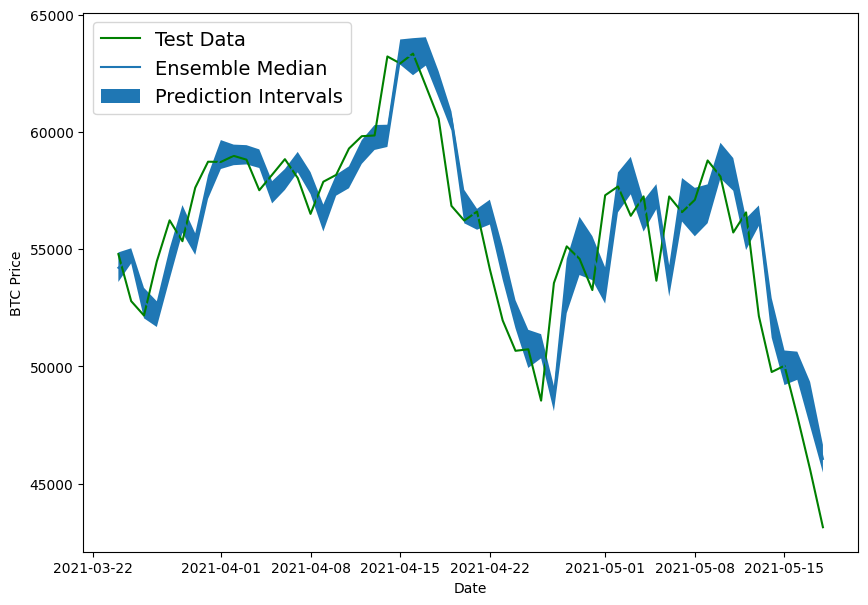

In [232]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 lower[offset:], 
                 upper[offset:], 
                 label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

So far all our model's prediction have been lagging behind the test data ie. they are replicating the naive model predicting the previous time step as the next time step

🚩**Note: The prediction intervals that we created right now are estimates obtained out of the model in which we assumed that our model's data is from a normal distribution**

## Uncertainty

There are two types of uncertainties:
* **Aleatoric uncertainty :** This type of uncertainty can't be reduced and it is often refered as data uncertainty or subway uncertainty
* **Epistemiun certainity :** This type of uncertainity can be reduced, it also refered to as `model` or `coconut` uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future

Till now our model is predicting the pseudo future but now we will build a model to predict future

In [233]:

# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
     

In [234]:
# Turn data int efficient running tensors

feature_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((feature_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [235]:
tf.random.set_seed(42)

# Create a simple model
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
],name='model_9_future_model')

# Compile
model_9.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam())

# Fit the model on all of the data to make future forecast
model_9.fit(dataset_all,
           epochs=100,
           verbose=0)

#### Make predictions into future

In [236]:
# How many timestep to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
   * a list of values (Bitcoin historical data)
   * a trained model (such as `model_9`)
   * a window ie. how many days into the future we want to predict(our `INTO_FUTURE` variable)
   * the window size a model was trained on (`WINDOW_SIZE`) - he model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end when it is full of predictions) and extracts the last `WINDOW_SIZE` values from the input values 

In [237]:

# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [238]:

# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 40ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55184.73046875

1/1 [==============================] - 0s 15ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55184.73046875] -> Prediction: 50355.26171875

1/1 [==============================] - 0s 22ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55184.73046875 50355.26171875] -> Prediction: 48446.09375

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55184.73046875 50355.26171875 48446.09375   ] -> Prediction: 49049.12890625

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55184.73046875
 50355.26171875 48446.09375    49049.1289

In [239]:
future_forecast

[55184.73,
 50355.26,
 48446.094,
 49049.13,
 46294.297,
 47480.312,
 47491.93,
 52903.543,
 49071.855,
 47749.715,
 48541.484,
 46791.95,
 48917.492,
 49020.273]

In [240]:

def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date
    

In [241]:
last_timestep = bitcoin_prices.index[-1]
type(last_timestep)

pandas._libs.tslibs.timestamps.Timestamp

In [242]:

# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps
     

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [243]:

# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55184.73 , 50355.26 , 48446.094, 49049.13 , 46294.297,
        47480.312, 47491.93 , 52903.543, 49071.855, 47749.715, 48541.484,
        46791.95 , 48917.492, 49020.273], dtype=float32))

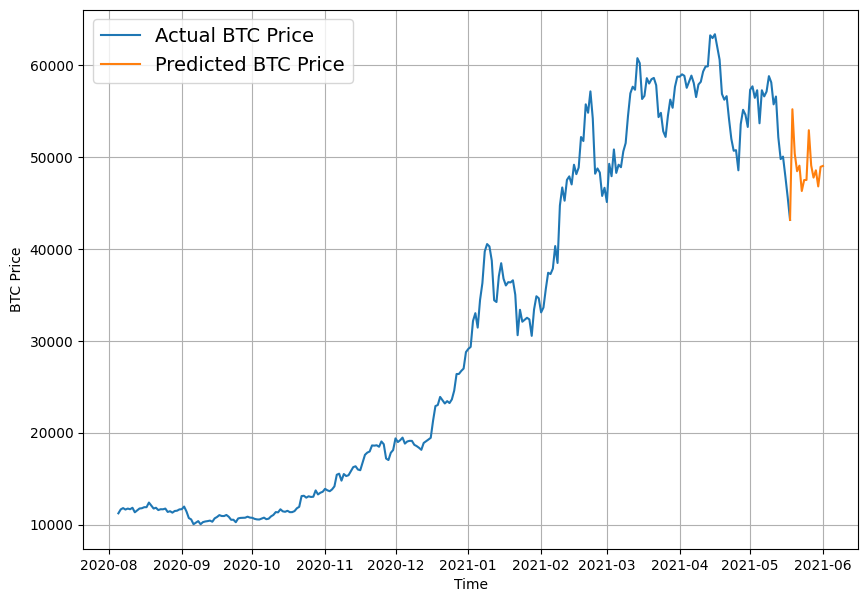

In [244]:

# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Introducing Turkey Problem

In [245]:
# Let's introduce a turkey problem to our BTC data price ie something bad happen on last day 
# (for ex. BTC price falls 100x on the last day)

btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [246]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [247]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

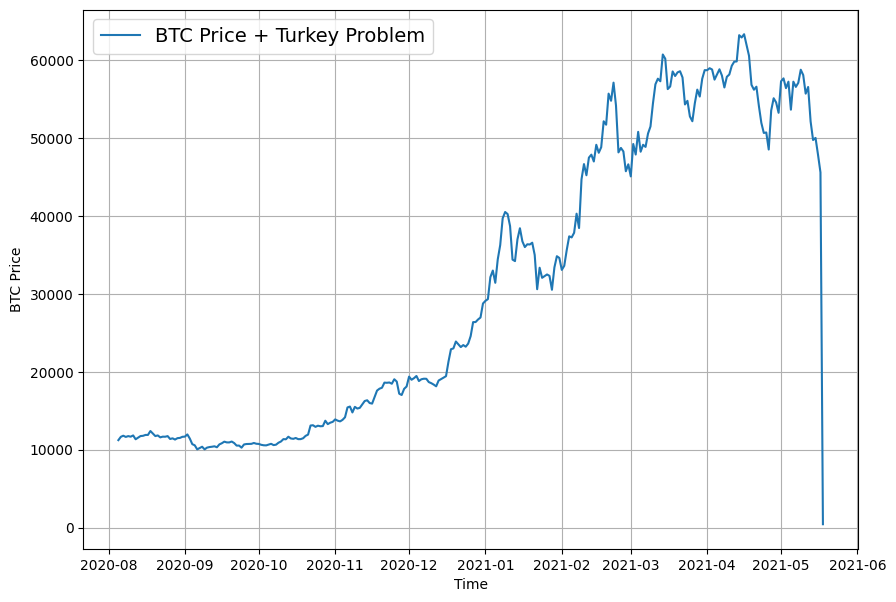

In [248]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                values=btc_price_turkey,
                format='-',
                label='BTC Price + Turkey Problem',
                start=2500)

In [249]:
WINDOW_SIZE = 7
HORIZON = 1

In [250]:
# Create train test set for the turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

### Building a turkey model

In [254]:

# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets


In [255]:
# Evaluate model on test data 
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 761.6661


761.6661376953125

In [257]:
# Loading the best performing turkey model and evaluate it on test data
turkey_model = tf.keras.models.load_model('model_experiments\Turkey_Model')
turkey_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 638.0768


638.0768432617188

In [258]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8839.759, 8780.152, 9041.38 , 8772.163, 8754.49 , 8739.787,
       8670.883, 8537.539, 8452.979, 8533.765], dtype=float32)>

In [261]:

# Evaluate turkey preds
turkey_results = evaluation_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17140.691,
 'mse': 615142140.0,
 'rmse': 23733.842,
 'mape': 121.51935,
 'mase': 26.525278}

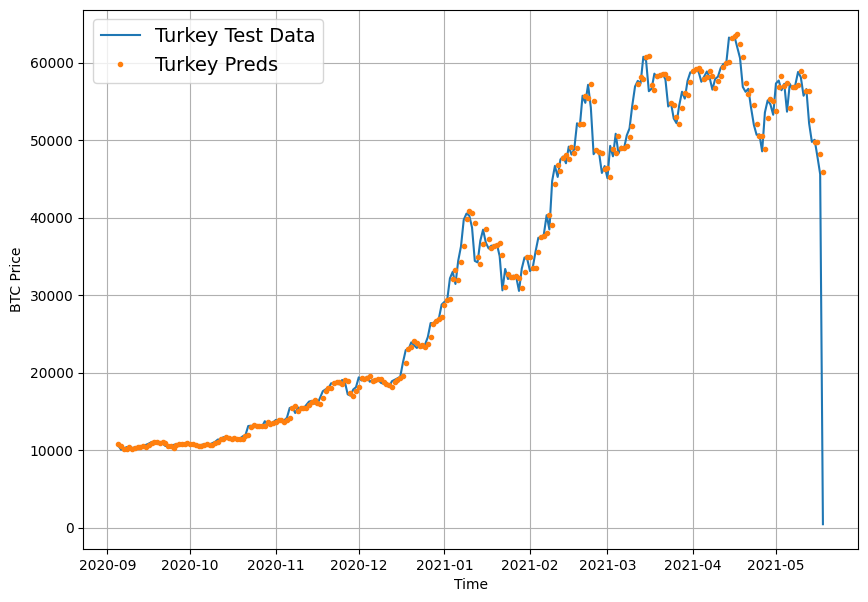

In [259]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

### Compare models

In [269]:
model_results = pd.DataFrame({'naive_model':naive_results,
                             'model_1_dense_w7_h1':model_1_results,
                             'model_2_dense_w30_h1': model_2_results,
                             'model_3_dense_w30_h7':model_3_results,
                             'model_4_CONV1D':model_4_results,
                             'model_5_LSTM':model_5_results,
                             'model_6_multivariate': model_6_results,
                             'model_7_NBEATS':model_7_results,
                             'model_8_ensemble':ensemble_results,
                             'model_10_turkey':turkey_results}).T

In [270]:
model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,567.564270,1.166994e+06,1080.275024,2.550946,0.997053
model_2_dense_w30_h1,614.290894,1.276256e+06,1129.715088,2.802429,1.073786
model_3_dense_w30_h7,1231.520020,5.256837e+06,1409.566772,5.497501,2.191421
model_4_CONV1D,569.113708,1.178526e+06,1085.599243,2.545443,0.999775
model_5_LSTM,583.370850,1.226428e+06,1107.441895,2.624110,1.024821
model_6_multivariate,575.602844,1.191546e+06,1091.579468,2.566277,1.011175
model_7_NBEATS,571.795105,1.171073e+06,1082.161377,2.583356,1.004486
model_8_ensemble,571.834778,1.149322e+06,1072.064209,2.578514,1.004555
model_10_turkey,17140.691406,6.151421e+08,23733.841797,121.519348,26.525278


<Axes: >

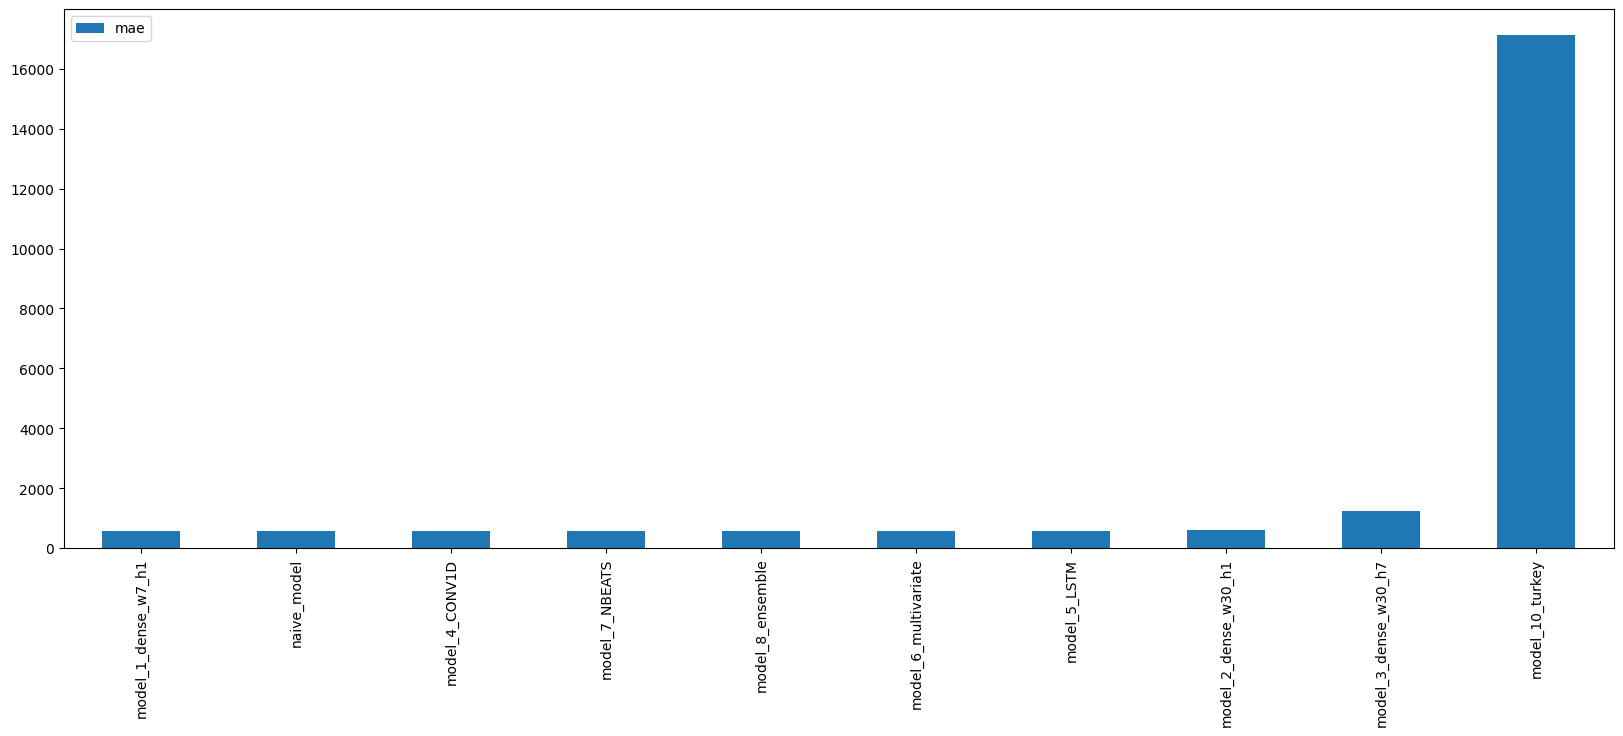

In [271]:
# Sort the model results based on the MAE and plot them 
model_results[['mae']].sort_values(by='mae').plot(figsize=(20, 7), kind='bar')
